# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('6d5e6f10.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-05-11T13:54:32.404895Z   
1  2020-05-11T13:54:32.409736Z   
2  2020-05-11T13:54:32.414470Z   
3  2020-05-11T13:54:32.420608Z   
4  2020-05-11T13:54:32.426592Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 4402, 'deaths': 120, 'recovered'...   
1   {'confirmed': 868, 'deaths': 31, 'recovered': 0}   
2  {'confirmed': 5723, 'deaths': 502, 'recovered'...   
3   {'confirmed': 755, 'deaths': 48, 'recovered': 0}   
4     {'confirmed': 45, 'deaths': 2, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 4402, 'timeline': {'2...  
1  {'confirmed': {'latest': 868, 'timeline': {'20...  
2  {'confirmed': {'latest': 5723, 'timeline': {'2...  
3  {'confirmed': {'latest': 755, 'timeline': {'20...  
4  {'confirmed': {'latest': 45, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
105      10810     256       NaN                     0.037016   
106      10822     256       NaN                     0.111008   
107      10840     256       NaN                     0.166328   
108      10874     256       NaN                     0.313653   
109      10909     256       NaN                     0.321869   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
105                                         114.541080                 
106                                         343.496089                 
107                                         514.672805                 
108                                         970.545455                 
109                                         995.967027                 

     deaths_percentage_change  \
105                  0.392157   
106                       NaN   
107                       NaN   
108                       NaN   
109                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
105                                        1213.461676           
106                                                NaN           
107                                                NaN           
108                                                NaN           
109                                                NaN           

     confirmed_new_cases  deaths_new_cases  
105                  4.0               1.0  
106                 12.0               NaN  
107                 18.0               NaN  
108                 34.0               NaN  
109                 35.0               NaN

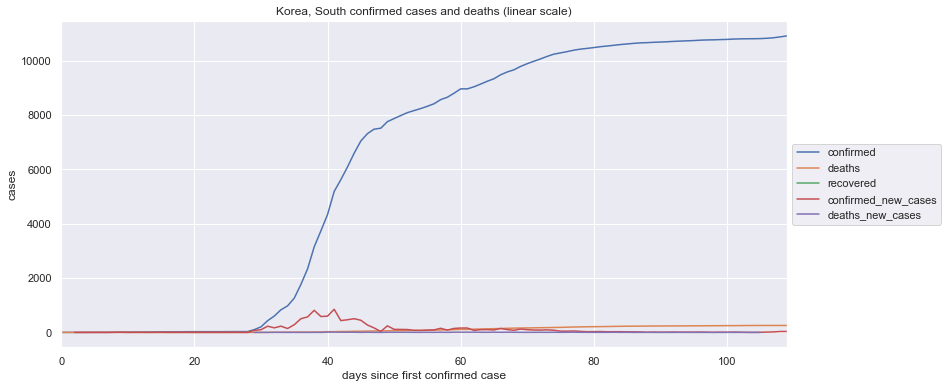

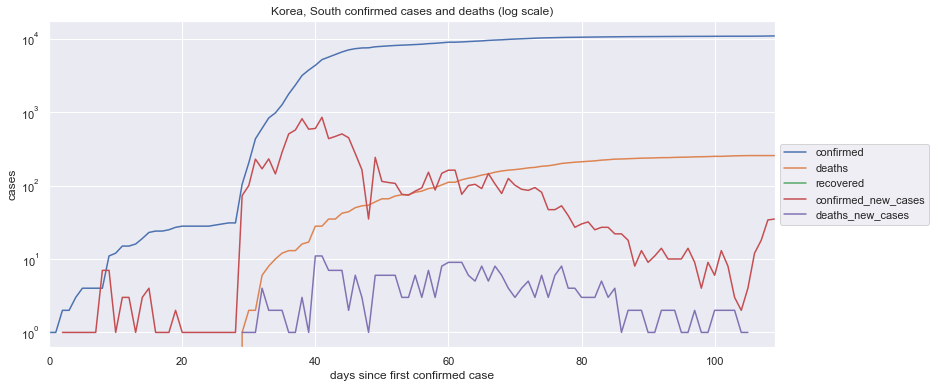

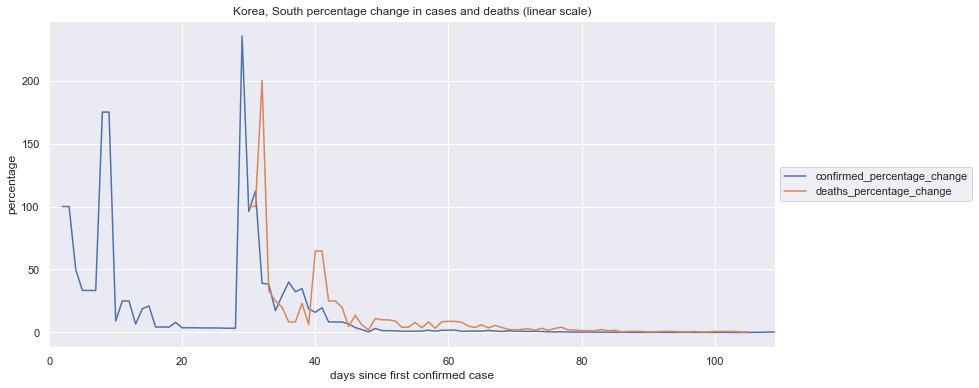

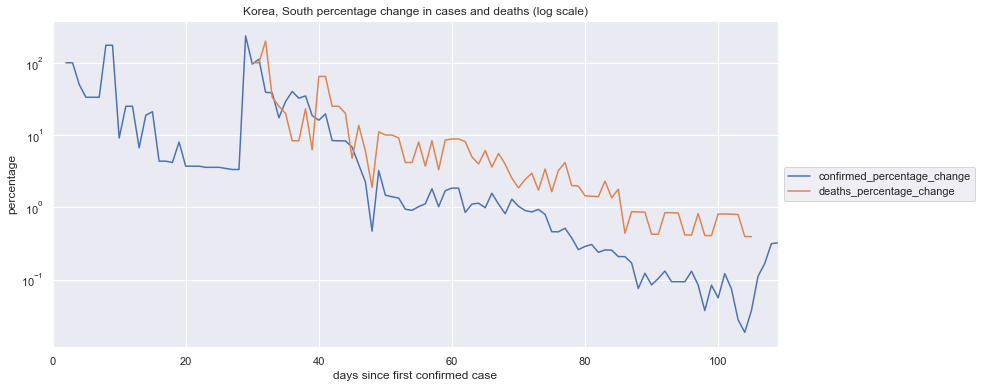

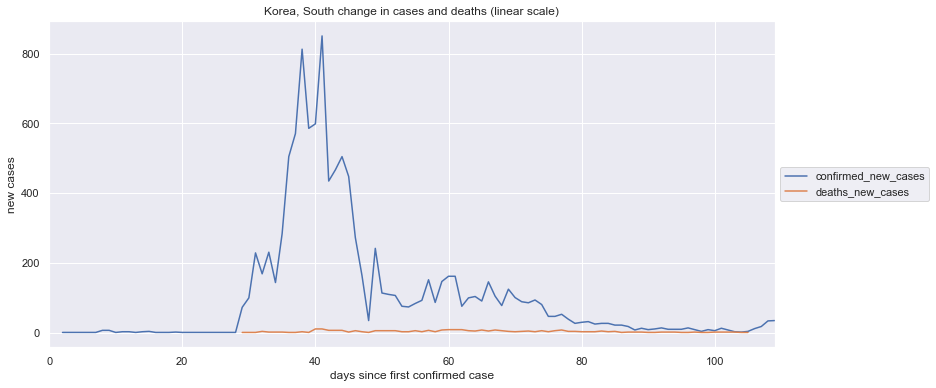

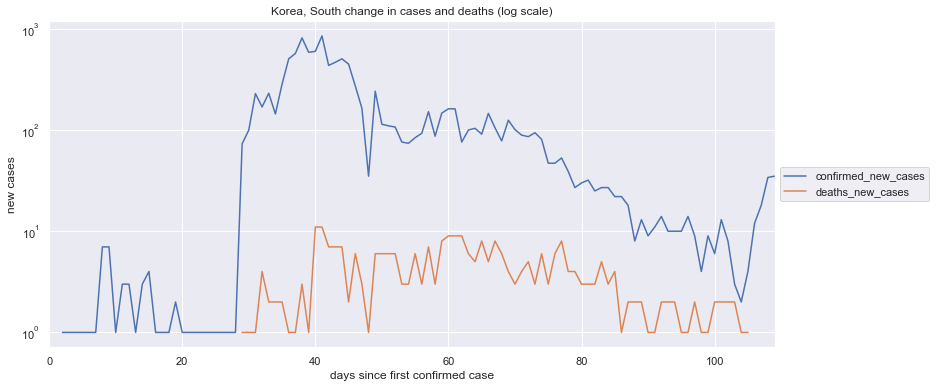

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
92      50781    8339       NaN                     0.538518   
93      51420    8415       NaN                     1.258345   
94      52011    8521       NaN                     1.149358   
95      52596    8581       NaN                     1.124762   
96      53081    8656       NaN                     0.922123   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
92                                        3896.343370                 
93                                        9104.512532                 
94                                        8315.962024                 
95                                        8138.001227                 
96                                        6671.847496                 

    deaths_percentage_change  \
92                  4.029441   
93                  0.911380   
94                  1.259655   
95                  0.704143   
96                  0.874024   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
92                                       29154.251951           
93                                        6594.117891           
94                                        9113.996003           
95                                        5094.690124           
96                                        6323.833840           

    confirmed_new_cases  deaths_new_cases  
92                272.0             323.0  
93                639.0              76.0  
94                591.0             106.0  
95                585.0              60.0  
96                485.0              75.0

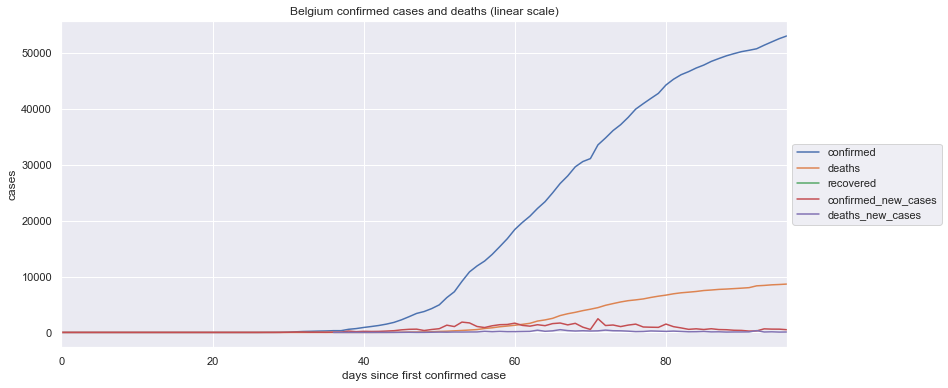

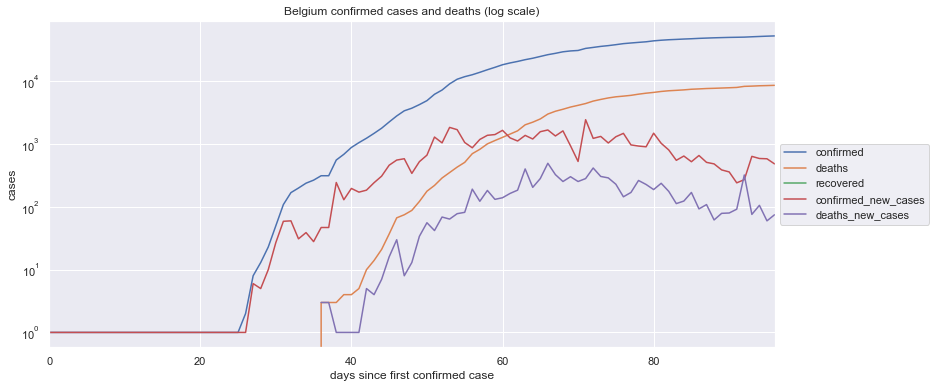

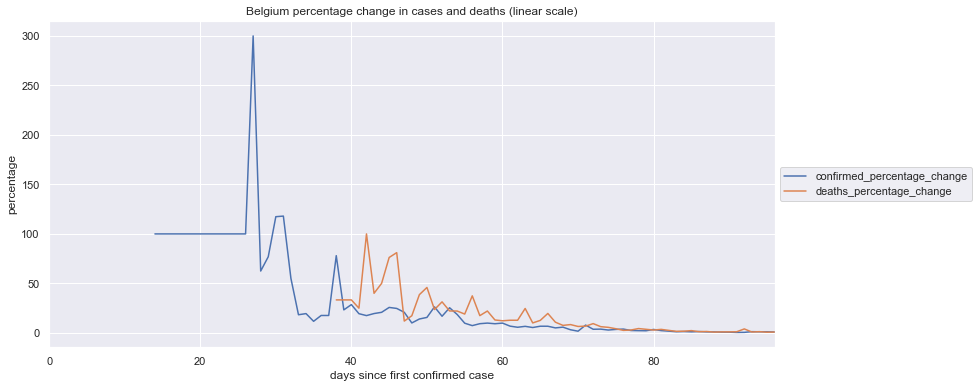

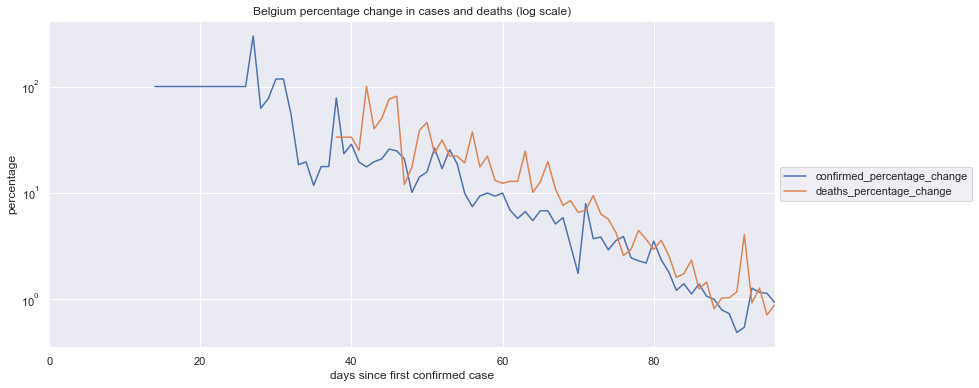

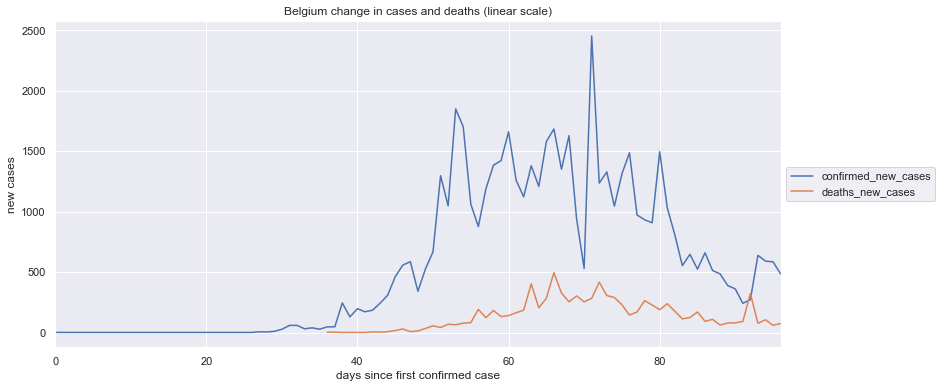

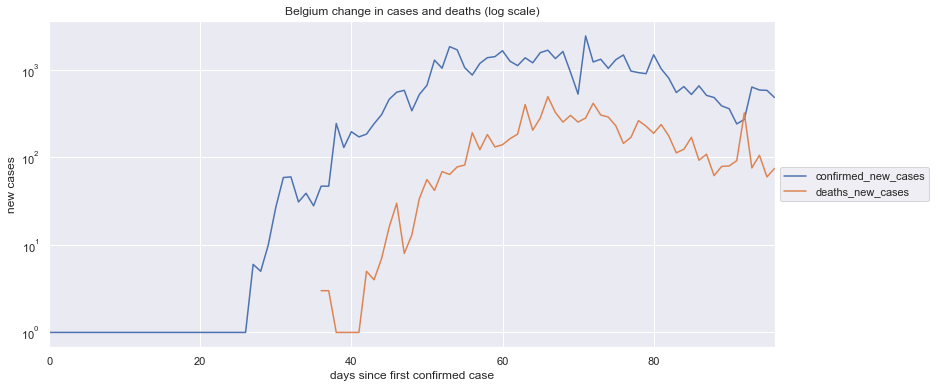

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
71      30060    1805       NaN                     0.169949   
72      30126    1810       NaN                     0.219561   
73      30207    1823       NaN                     0.268871   
74      30251    1830       NaN                     0.145662   
75      30305    1833       NaN                     0.178506   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
71                                         945.040897                 
72                                        1220.919162                 
73                                        1495.118095                 
74                                         809.985103                 
75                                         992.626750                 

    deaths_percentage_change  \
71                  0.557103   
72                  0.277008   
73                  0.718232   
74                  0.383982   
75                  0.163934   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
71                                        3097.900734           
72                                        1540.368925           
73                                        3993.895781           
74                                        2135.223408           
75                                         911.595380           

    confirmed_new_cases  deaths_new_cases  
71                 51.0              10.0  
72                 66.0               5.0  
73                 81.0              13.0  
74                 44.0               7.0  
75                 54.0               3.0

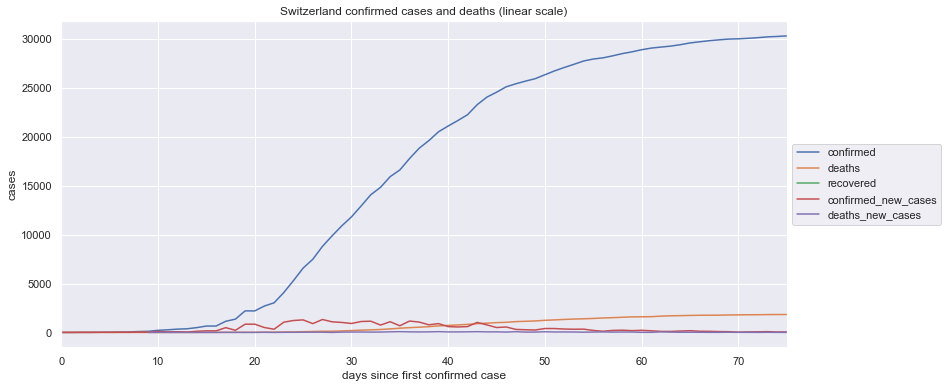

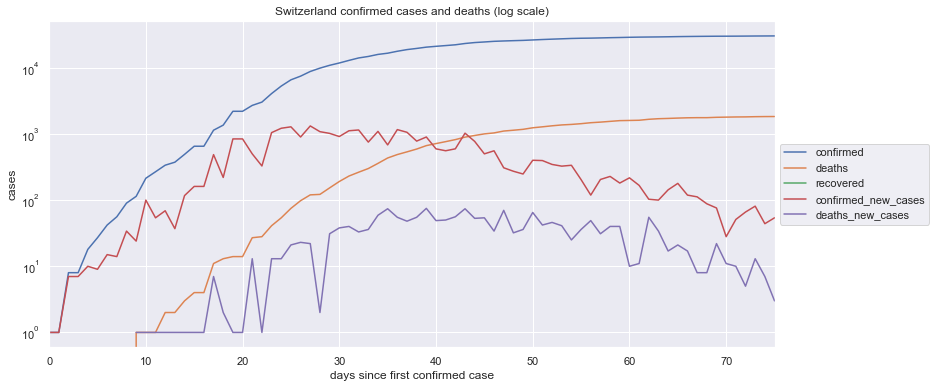

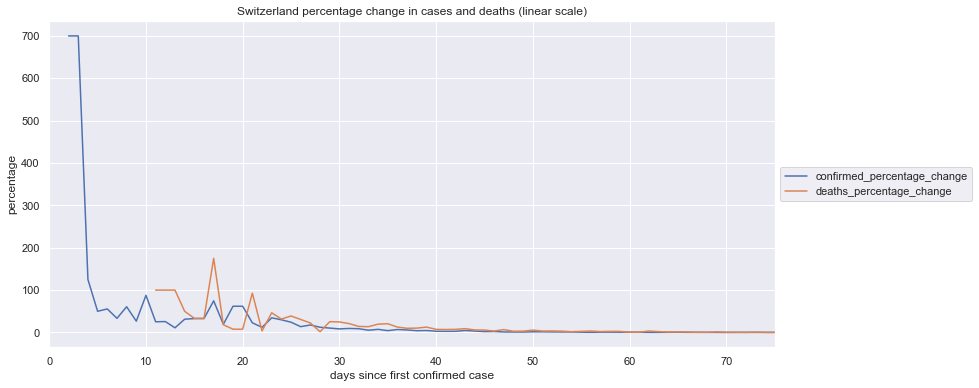

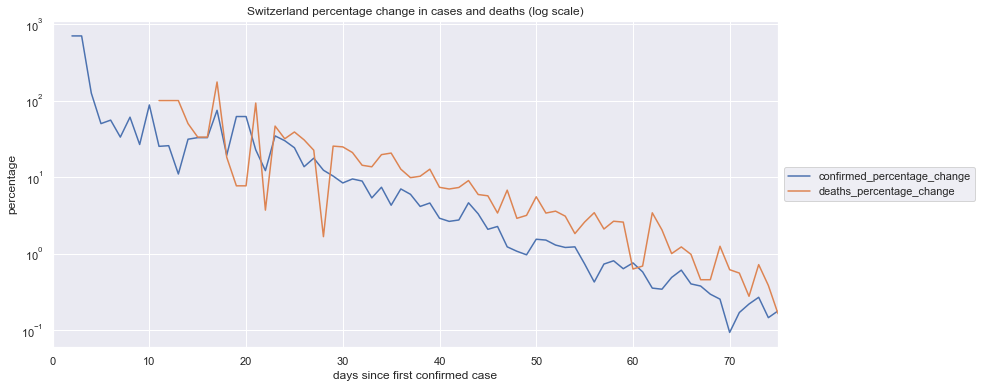

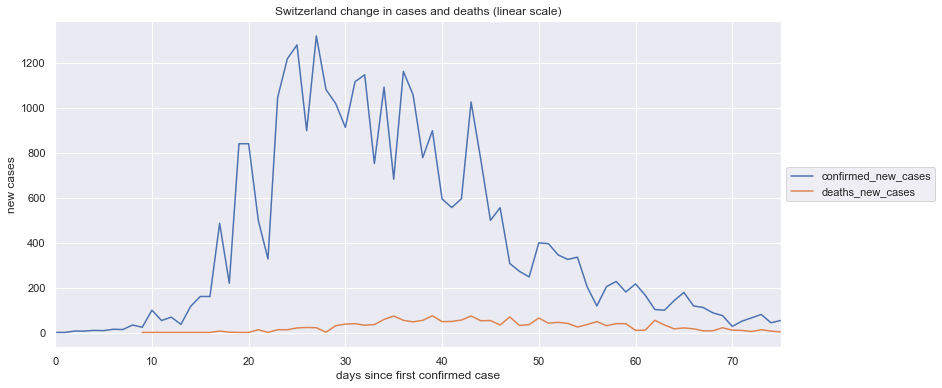

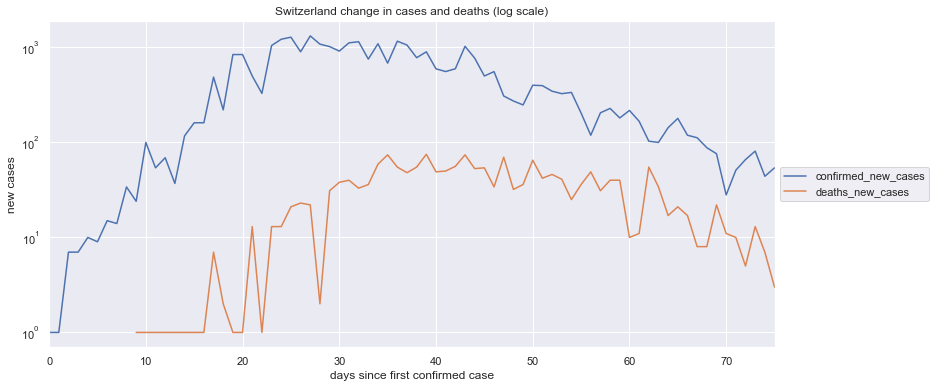

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
70       2663     147       NaN                     0.794852   
71       2678     148       NaN                     0.563275   
72       2691     150       NaN                     0.485437   
73       2710     151       NaN                     0.706057   
74       2716     151       NaN                     0.221402   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
70                                         376.890097                 
71                                         267.084286                 
72                                         230.176523                 
73                                         334.786663                 
74                                         104.980879                 

    deaths_percentage_change  \
70                  0.684932   
71                  0.680272   
72                  1.351351   
73                  0.666667   
74                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
70                                         324.769614           
71                                         322.560297           
72                                         640.761671           
73                                         316.109091           
74                                                NaN           

    confirmed_new_cases  deaths_new_cases  
70                 21.0               1.0  
71                 15.0               1.0  
72                 13.0               2.0  
73                 19.0               1.0  
74                  6.0               NaN

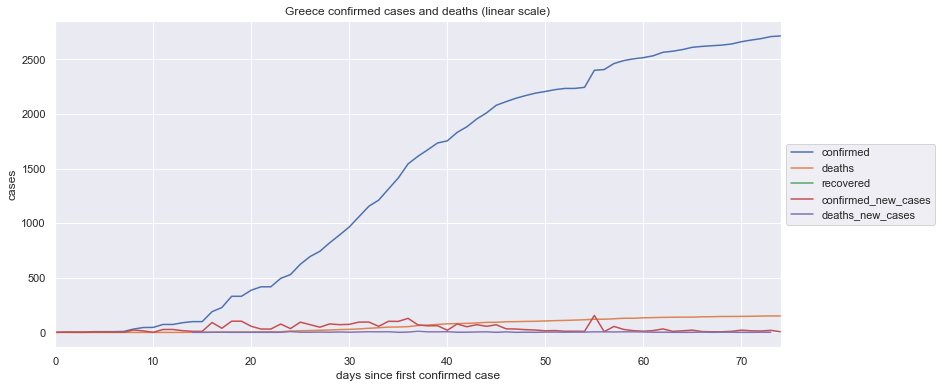

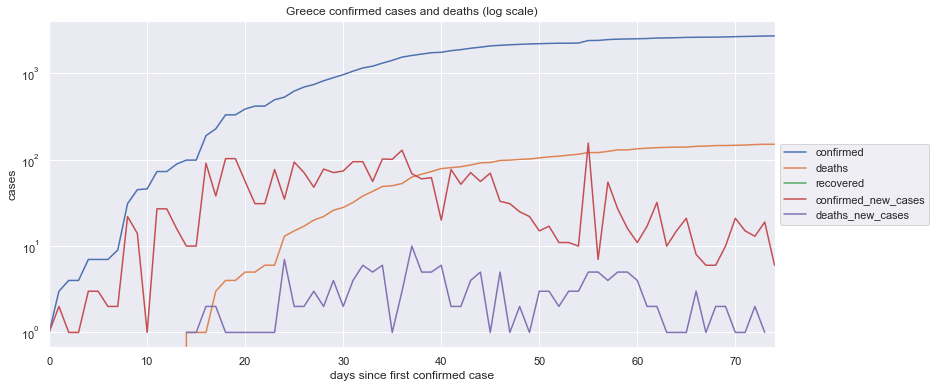

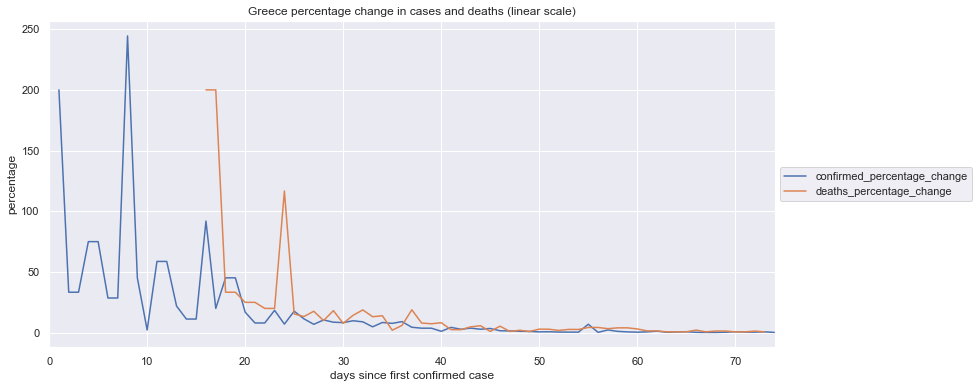

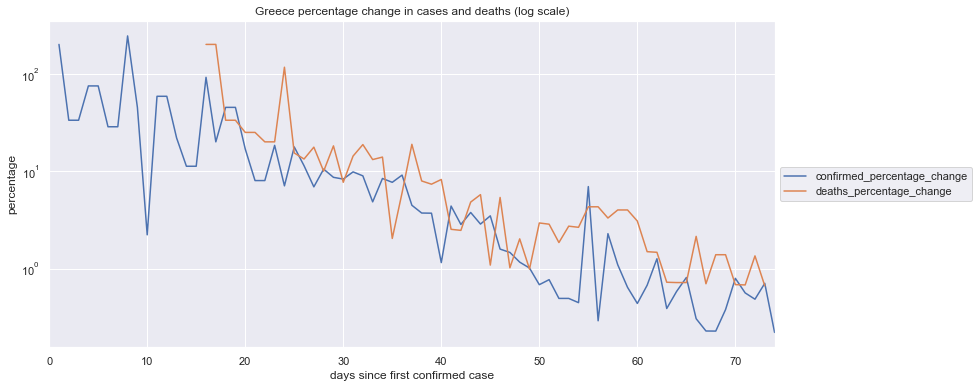

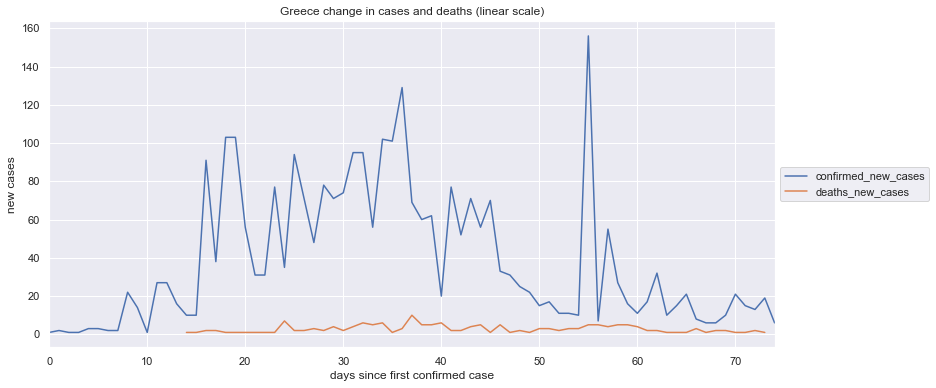

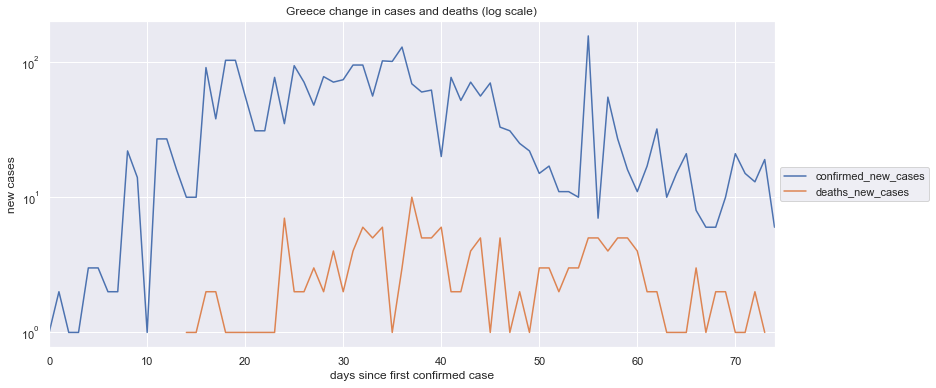

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
70       7996     216       NaN                     0.515399   
71       8034     217       NaN                     0.475238   
72       8070     218       NaN                     0.448096   
73       8099     219       NaN                     0.359356   
74       8105     219       NaN                     0.074083   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
70                                         776.333981                 
71                                         715.839624                 
72                                         674.956209                 
73                                         541.289231                 
74                                         111.589871                 

    deaths_percentage_change  \
70                  0.465116   
71                  0.462963   
72                  0.460829   
73                  0.458716   
74                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
70                                         700.594080           
71                                         697.350589           
72                                         694.136992           
73                                         690.952877           
74                                                NaN           

    confirmed_new_cases  deaths_new_cases  
70                 41.0               1.0  
71                 38.0               1.0  
72                 36.0               1.0  
73                 29.0               1.0  
74                  6.0               NaN

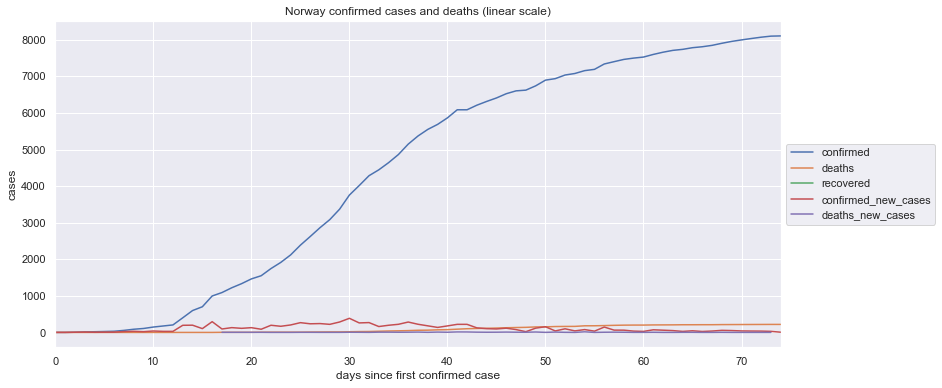

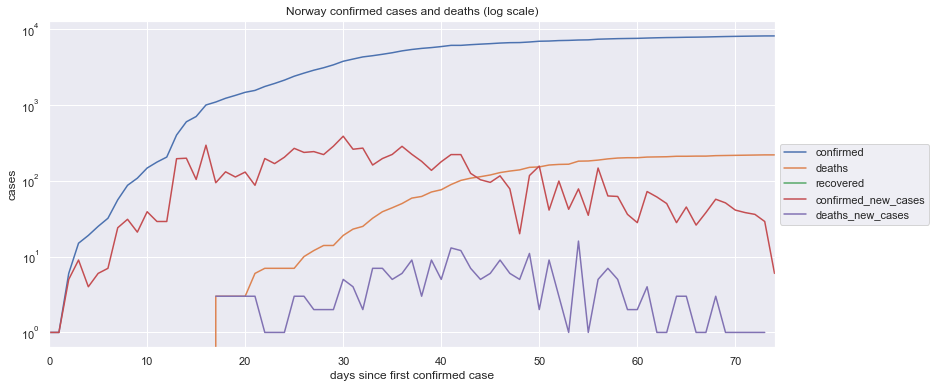

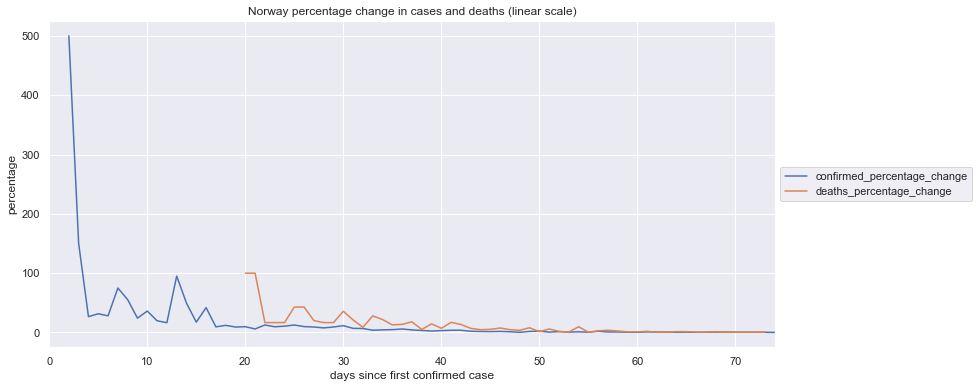

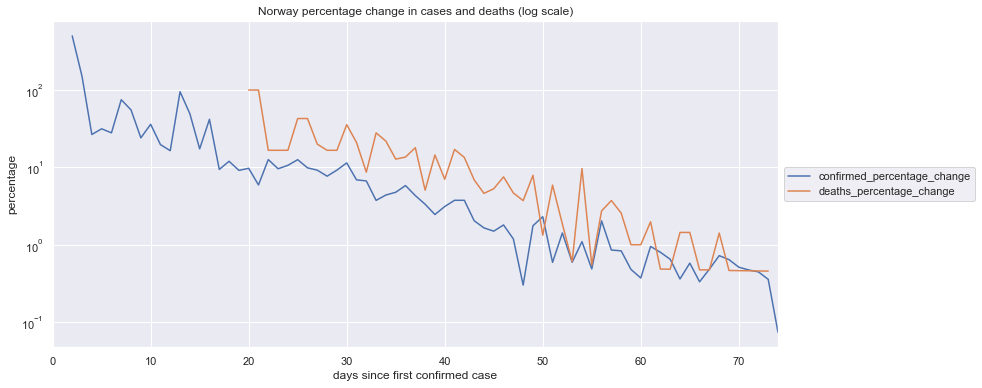

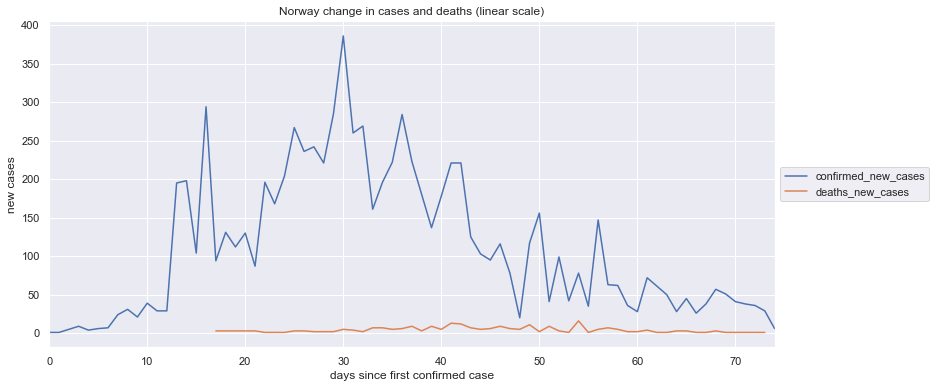

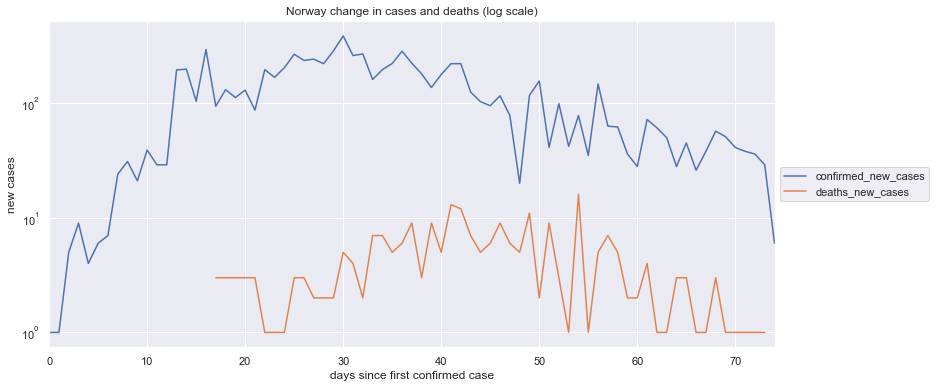

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
71      15684     608       NaN                     0.217252   
72      15752     609       NaN                     0.433563   
73      15774     614       NaN                     0.139665   
74      15833     615       NaN                     0.374033   
75      15871     618       NaN                     0.240005   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
71                                         650.704502                 
72                                        1298.587791                 
73                                         418.317674                 
74                                        1120.287297                 
75                                         718.852225                 

    deaths_percentage_change  \
71                  0.330033   
72                  0.164474   
73                  0.821018   
74                  0.162866   
75                  0.487805   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
71                                         988.499850           
72                                         492.624103           
73                                        2459.075981           
74                                         487.810187           
75                                        1461.050998           

    confirmed_new_cases  deaths_new_cases  
71                 34.0               2.0  
72                 68.0               1.0  
73                 22.0               5.0  
74                 59.0               1.0  
75                 38.0               3.0

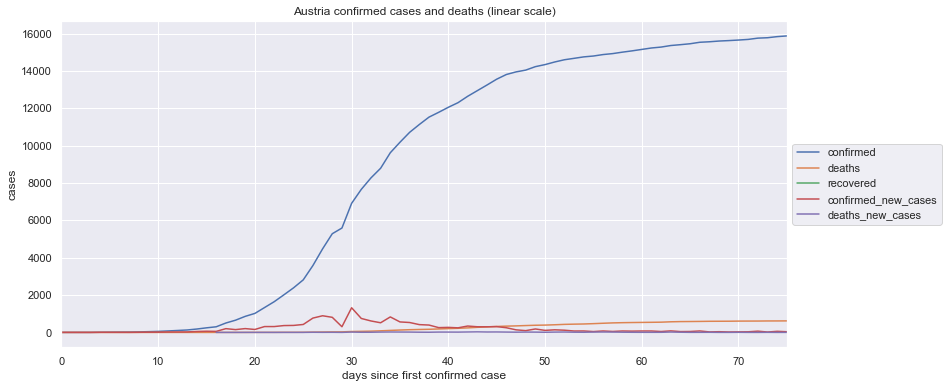

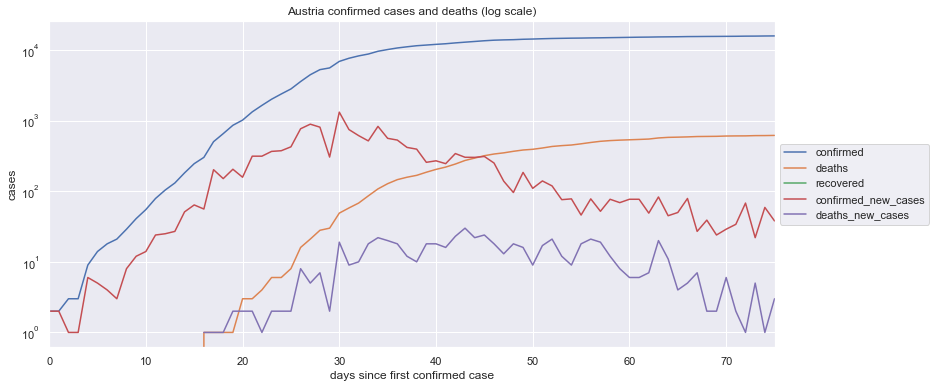

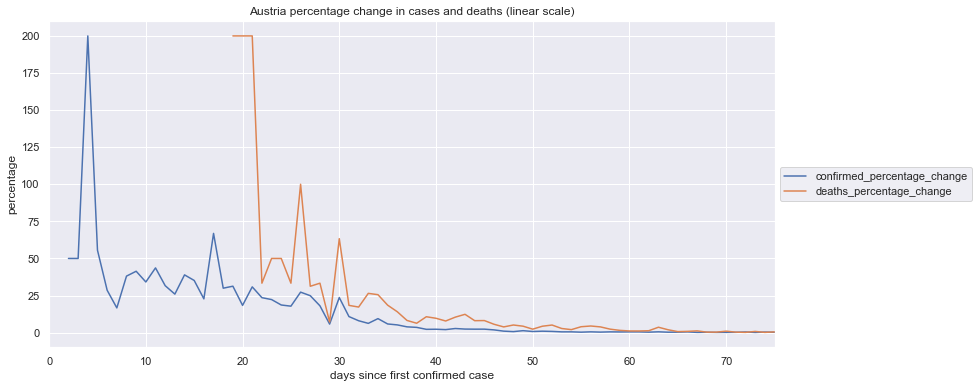

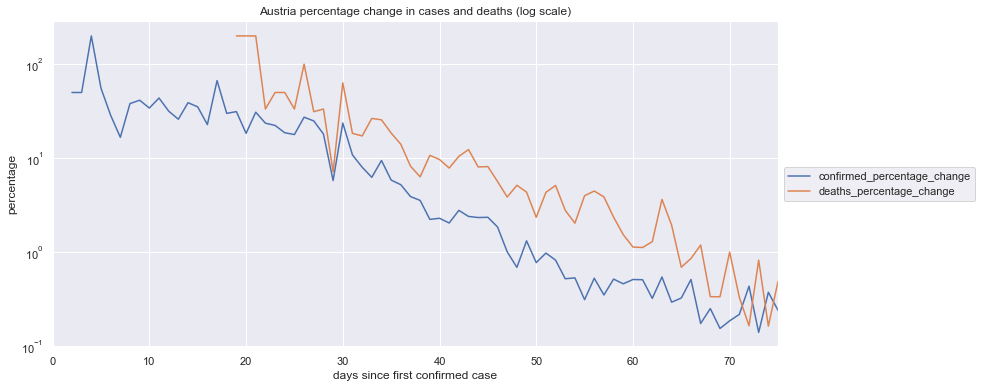

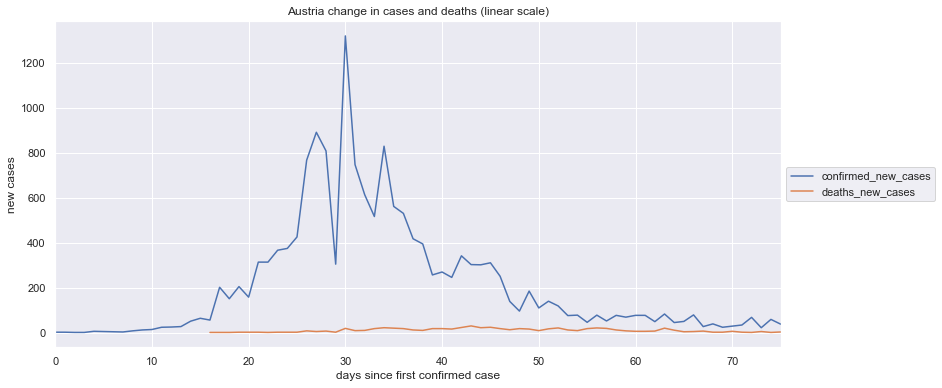

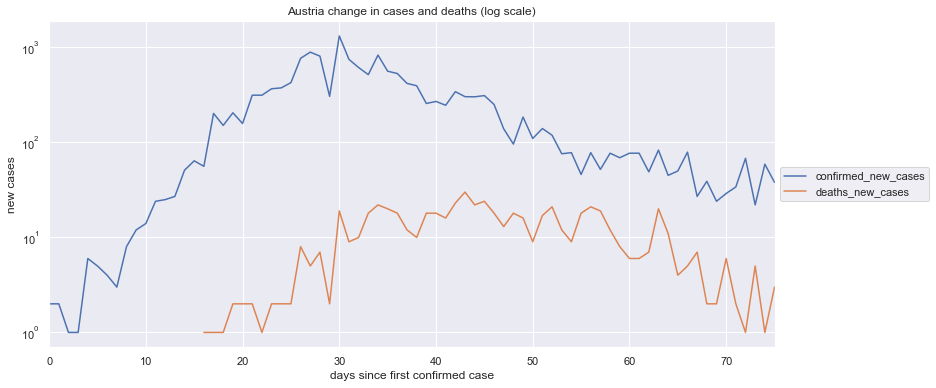

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
96       23918    2941       NaN                     3.023777   
97       24623    3040       NaN                     2.947571   
98       25265    3175       NaN                     2.607318   
99       25921    3220       NaN                     2.596477   
100      26322    3225       NaN                     1.547008   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
96                                         9071.178928                 
97                                         8842.565223                 
98                                         7821.824717                 
99                                         7789.302197                 
100                                        4640.947301                 

     deaths_percentage_change  \
96                   3.048353   
97                   3.366202   
98                   4.440789   
99                   1.417323   
100                  0.155280   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
96                                         9144.907148           
97                                        10098.437606           
98                                        13322.146382           
99                                         4251.897638           
100                                         465.830745           

     confirmed_new_cases  deaths_new_cases  
96                 702.0              87.0  
97                 705.0              99.0  
98                 642.0             135.0  
99                 656.0              45.0  
100                401.0               5.0

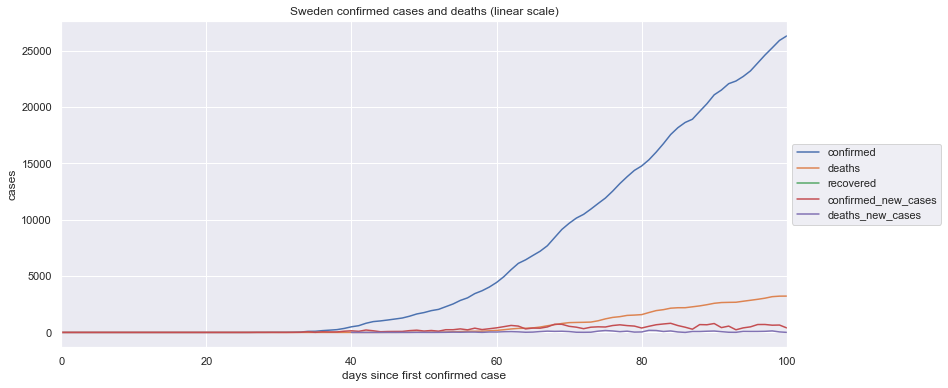

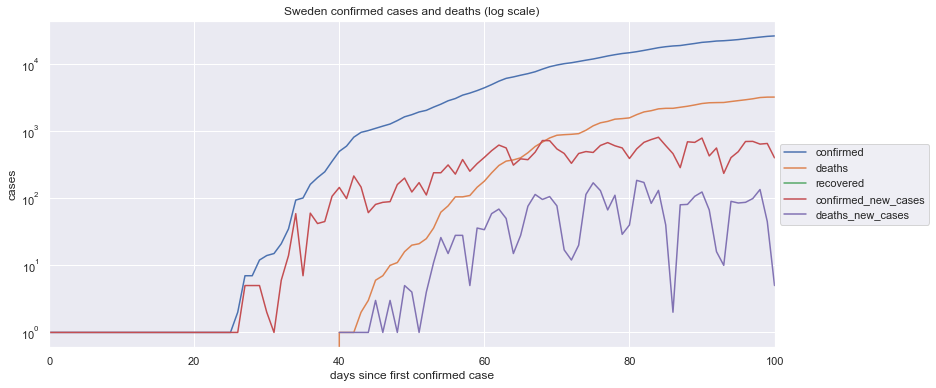

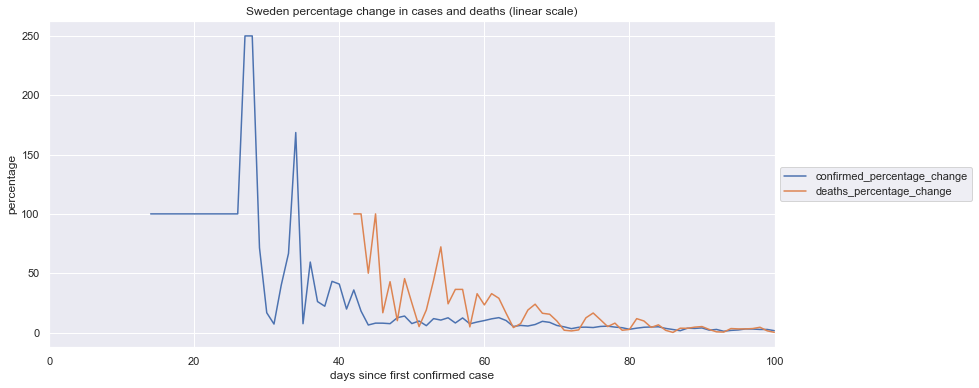

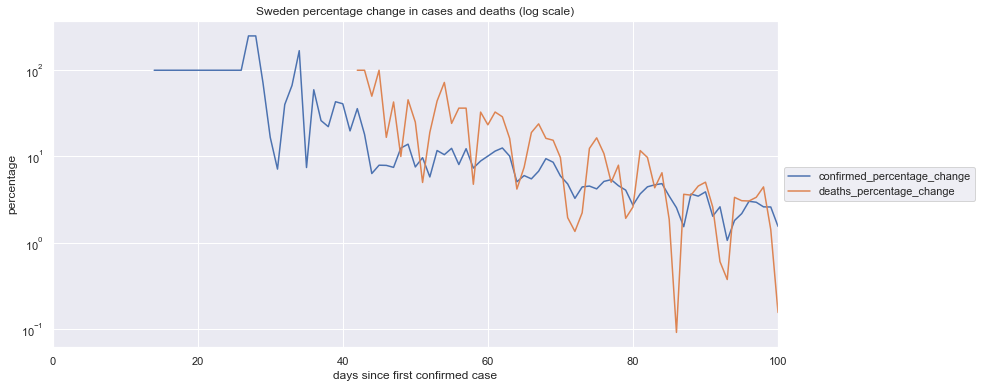

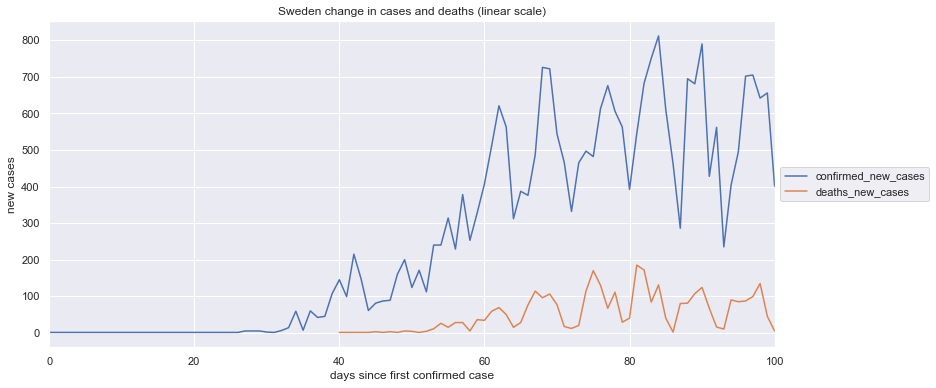

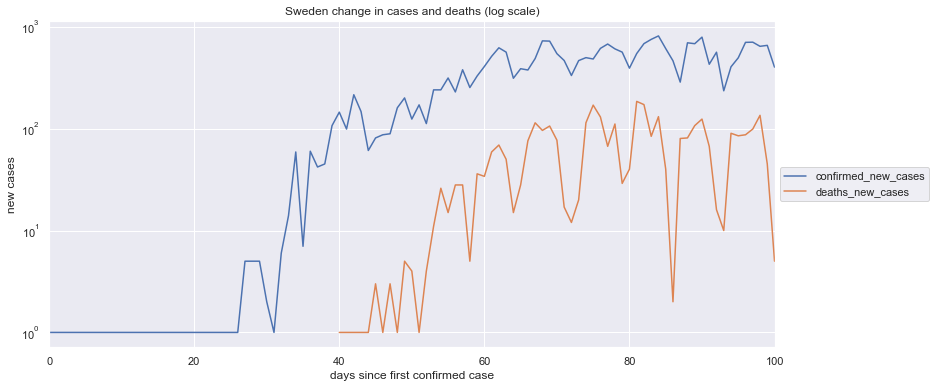

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
67      22248    1375       NaN                     1.205477   
68      22385    1403       NaN                     0.615786   
69      22541    1429       NaN                     0.696895   
70      22760    1446       NaN                     0.971563   
71      22996    1458       NaN                     1.036907   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
67                                        3339.001315                 
68                                        1705.639588                 
69                                        1930.301622                 
70                                        2691.092413                 
71                                        2872.085876                 

    deaths_percentage_change  \
67                  2.688574   
68                  2.036364   
69                  1.853172   
70                  1.189643   
71                  0.829876   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
67                                        7446.969923           
68                                        5640.440331           
69                                        5133.024687           
70                                        3295.143775           
71                                        2298.638250           

    confirmed_new_cases  deaths_new_cases  
67                265.0              36.0  
68                137.0              28.0  
69                156.0              26.0  
70                219.0              17.0  
71                236.0              12.0

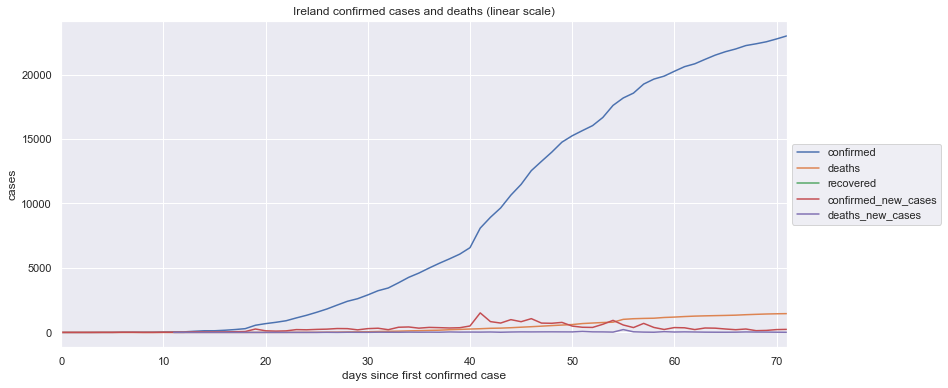

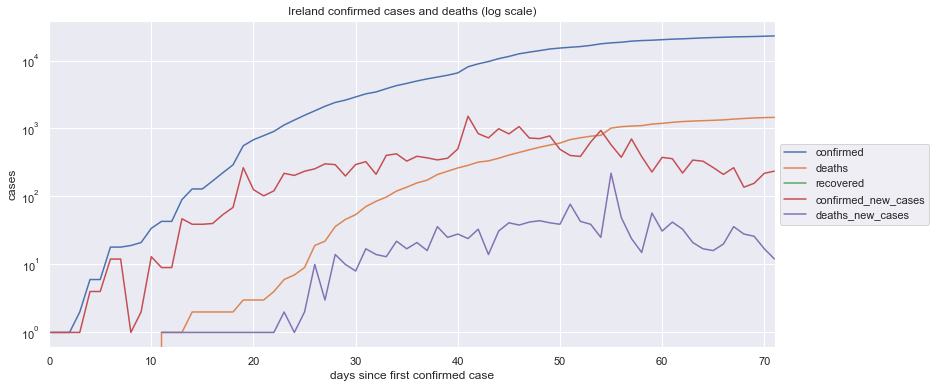

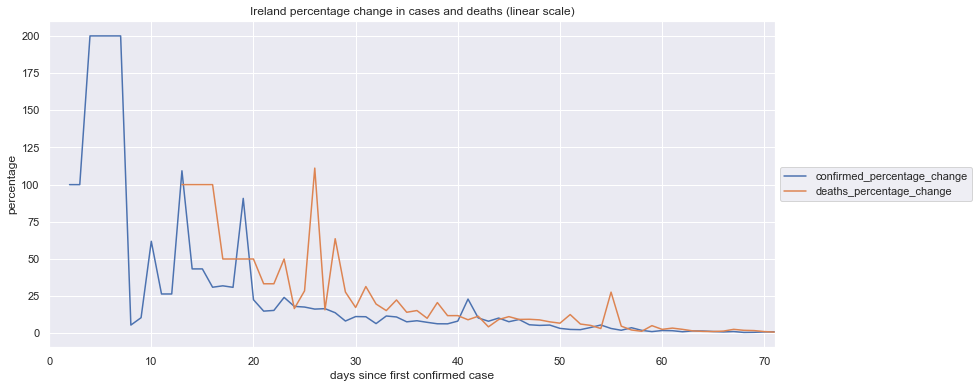

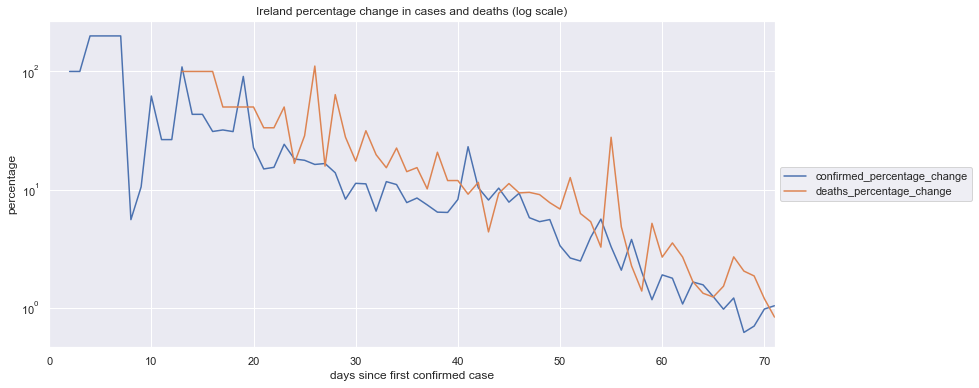

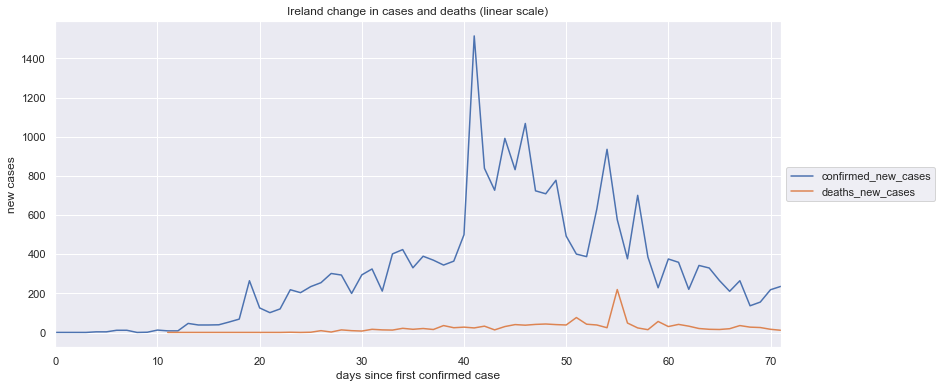

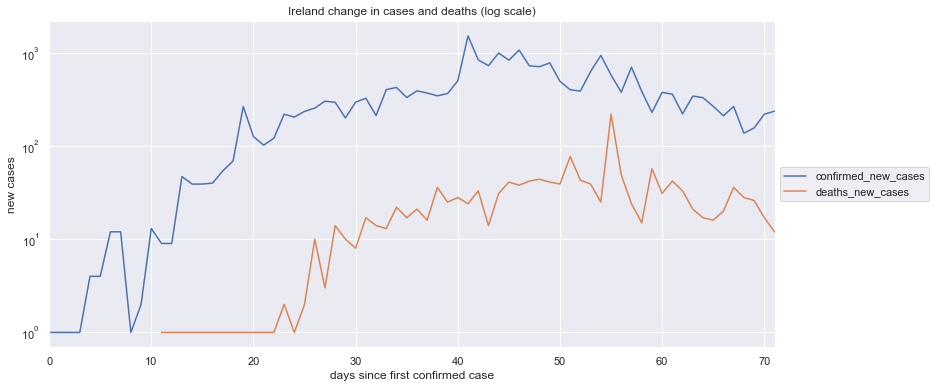

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
96      201101   30076       NaN                     3.134007   
97      206715   30615       NaN                     2.791632   
98      211364   31241       NaN                     2.248990   
99      215260   31587       NaN                     1.843266   
100     219183   31855       NaN                     1.822447   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
96                                        73533.374187                 
97                                        65500.215423                 
98                                        52768.178691                 
99                                        43248.642394                 
100                                       42760.179774                 

     deaths_percentage_change  \
96                   2.205458   
97                   1.792127   
98                   2.044749   
99                   1.107519   
100                  0.848450   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
96                                        51746.771332           
97                                        42048.764463           
98                                        47976.064496           
99                                        25985.777897           
100                                       19907.235946           

     confirmed_new_cases  deaths_new_cases  
96                6111.0             649.0  
97                5614.0             539.0  
98                4649.0             626.0  
99                3896.0             346.0  
100               3923.0             268.0

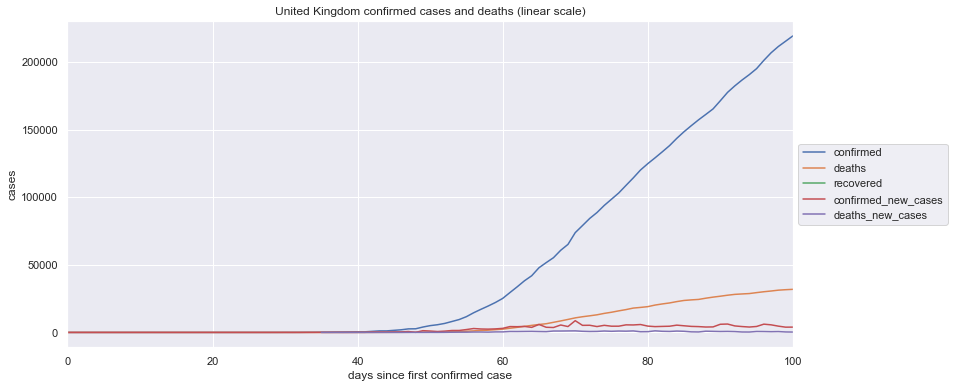

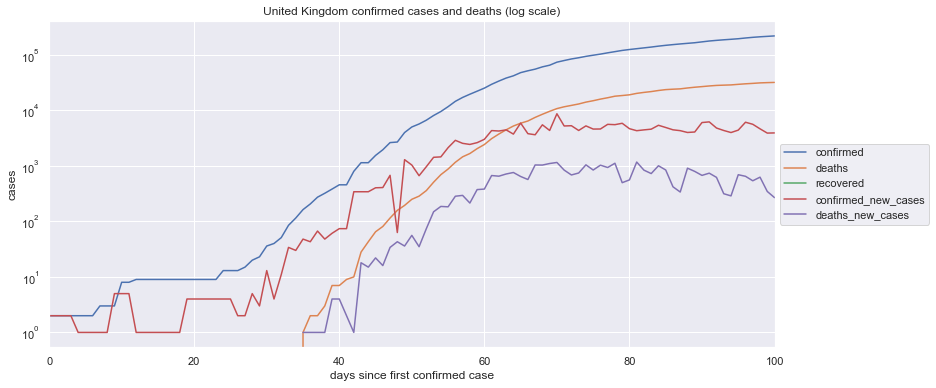

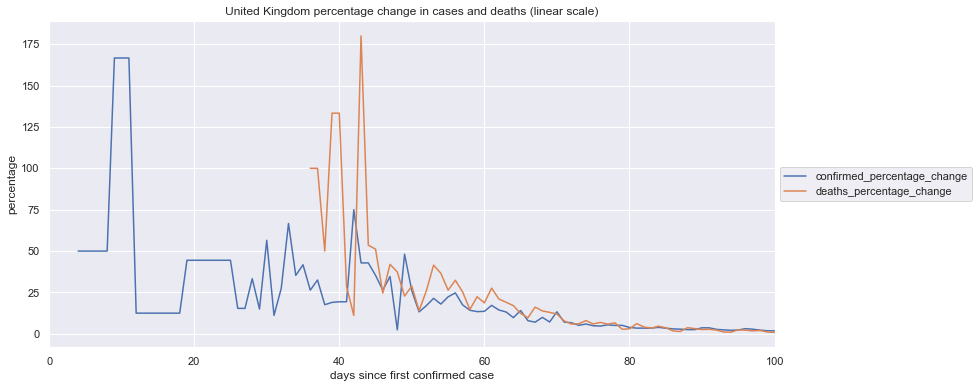

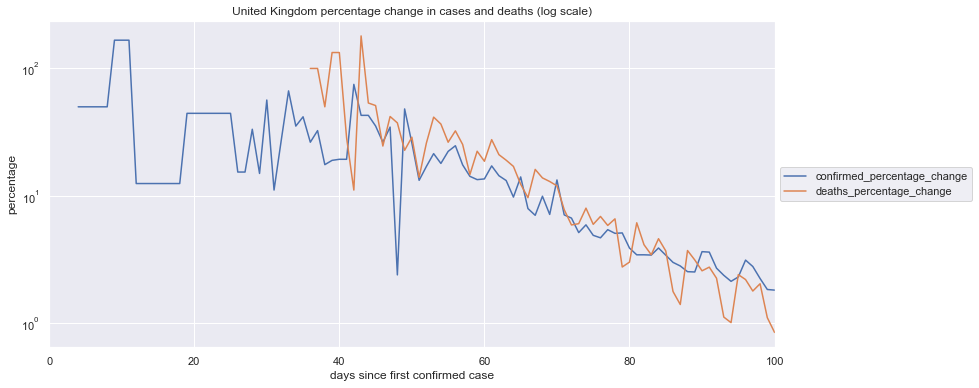

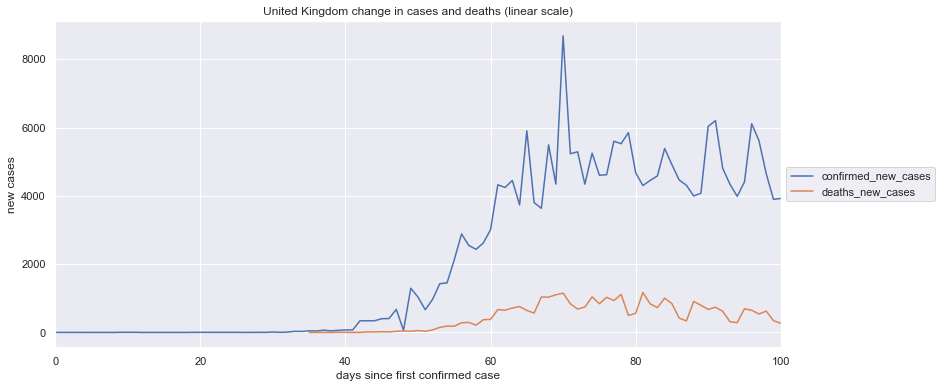

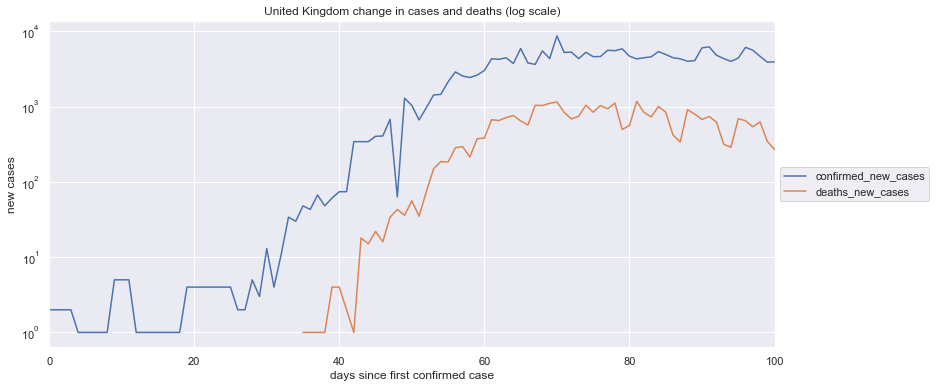

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
100     168162    7275       NaN                     0.691588   
101     169430    7392       NaN                     0.754035   
102     170588    7510       NaN                     0.683468   
103     171324    7549       NaN                     0.431449   
104     171879    7569       NaN                     0.323948   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
100                                       19524.569779                 
101                                       21287.543732                 
102                                       19295.338955                 
103                                       12180.454684                 
104                                        9145.531314                 

     deaths_percentage_change  \
100                  4.032604   
101                  1.608247   
102                  1.596320   
103                  0.519308   
104                  0.264936   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
100                                      113846.515737           
101                                       45403.259044           
102                                       45066.539625           
103                                       14660.839305           
104                                        7479.537326           

     confirmed_new_cases  deaths_new_cases  
100               1155.0             282.0  
101               1268.0             117.0  
102               1158.0             118.0  
103                736.0              39.0  
104                555.0              20.0

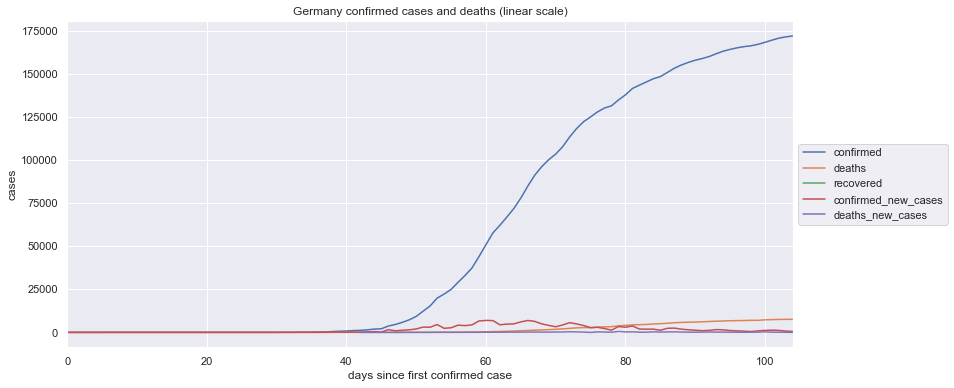

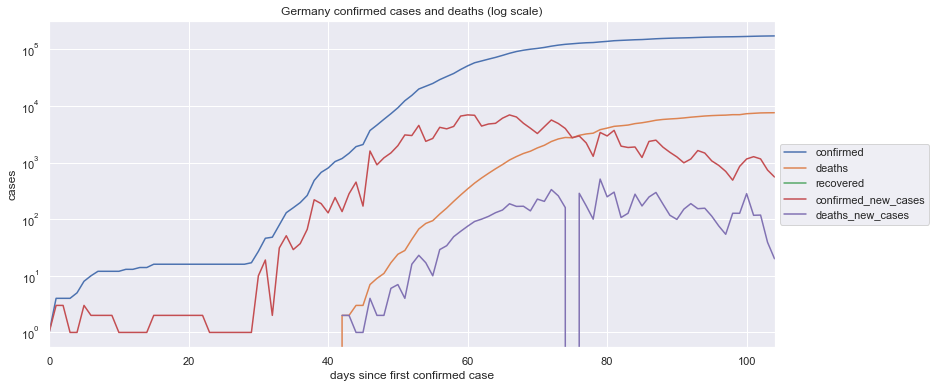

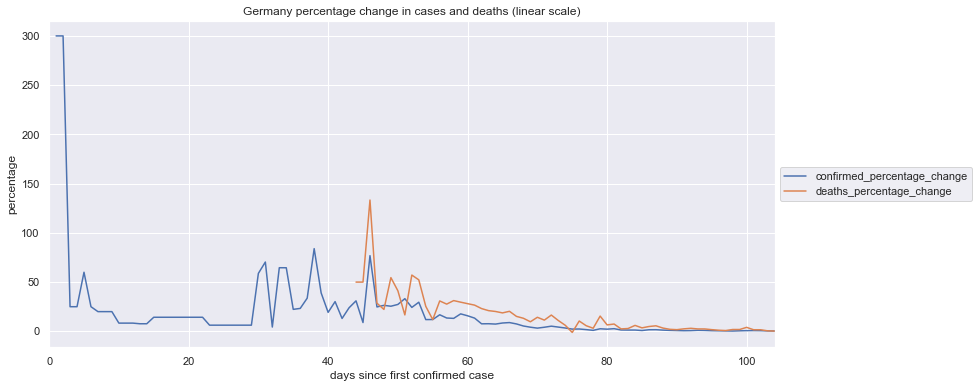

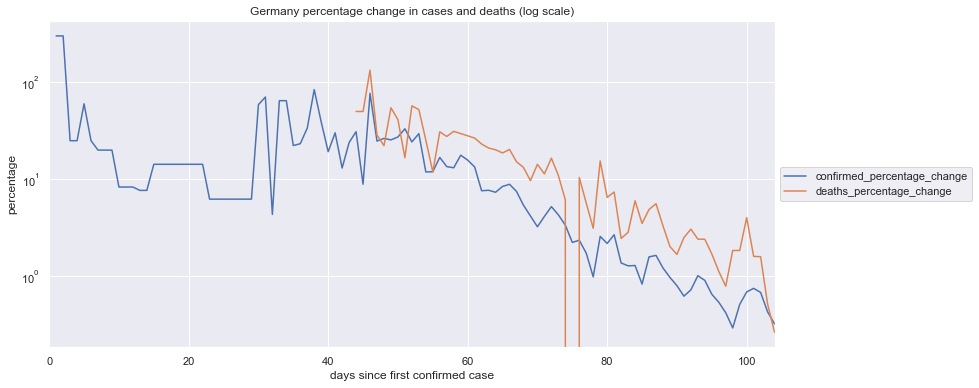

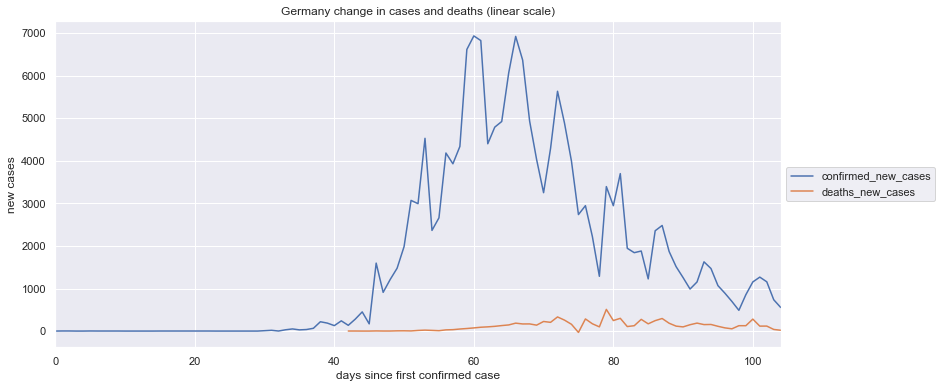

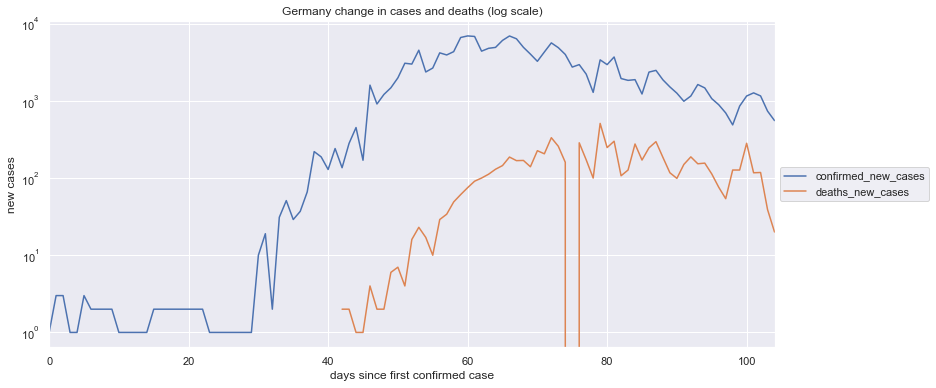

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
96      214457   29684       NaN                     0.677893   
97      215858   29958       NaN                     0.653278   
98      217185   30201       NaN                     0.614756   
99      218268   30395       NaN                     0.498653   
100     219070   30560       NaN                     0.367438   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
96                                        25503.794476                 
97                                        24577.721821                 
98                                        23128.447921                 
99                                        18760.410846                 
100                                       13823.818238                 

     deaths_percentage_change  \
96                   1.258741   
97                   0.923056   
98                   0.811136   
99                   0.642363   
100                  0.542852   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
96                                        47356.563891           
97                                        34727.366901           
98                                        30516.672205           
99                                        24167.076798           
100                                       20423.280967           

     confirmed_new_cases  deaths_new_cases  
96                1444.0             369.0  
97                1401.0             274.0  
98                1327.0             243.0  
99                1083.0             194.0  
100                802.0             165.0

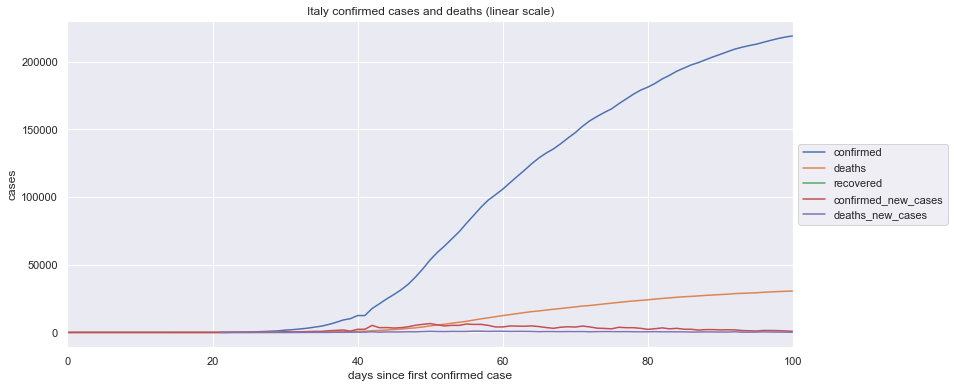

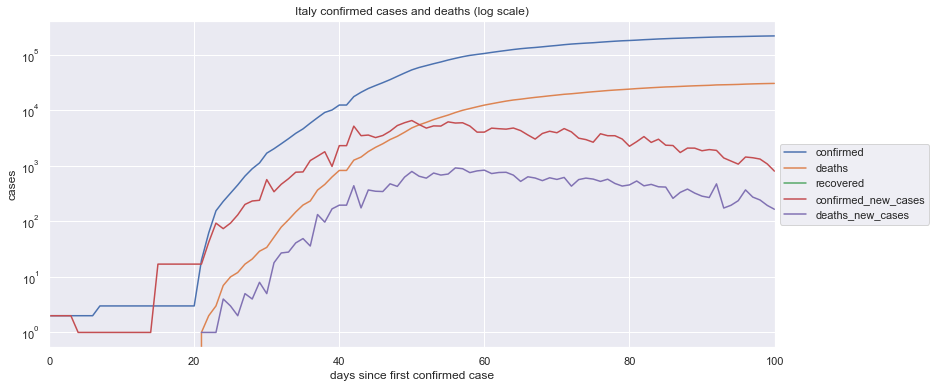

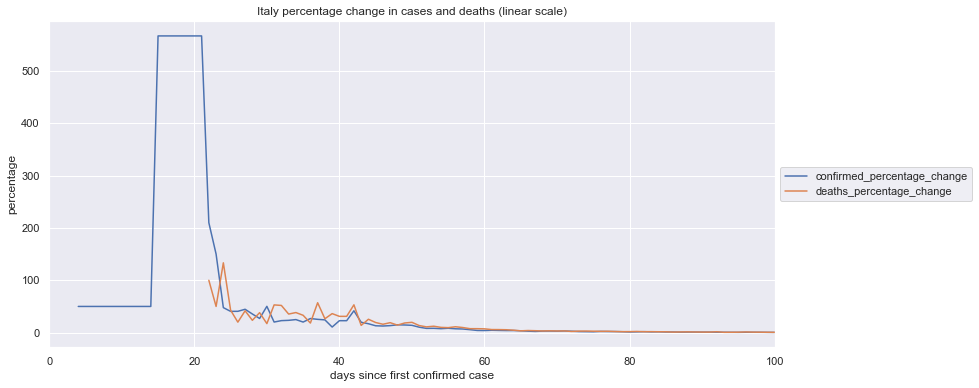

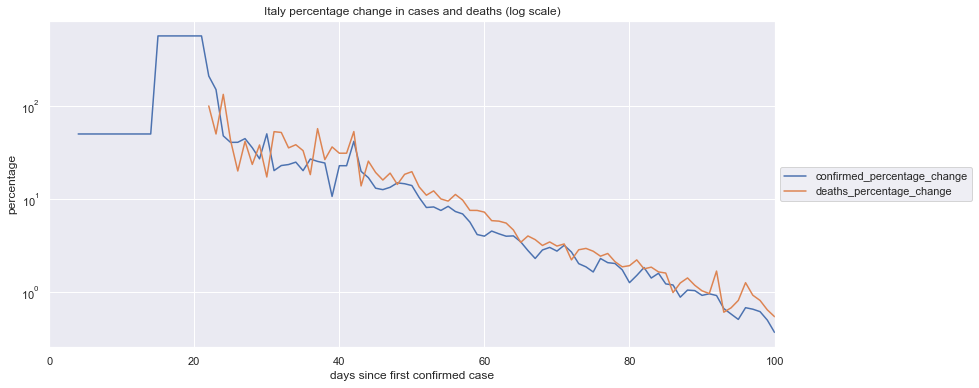

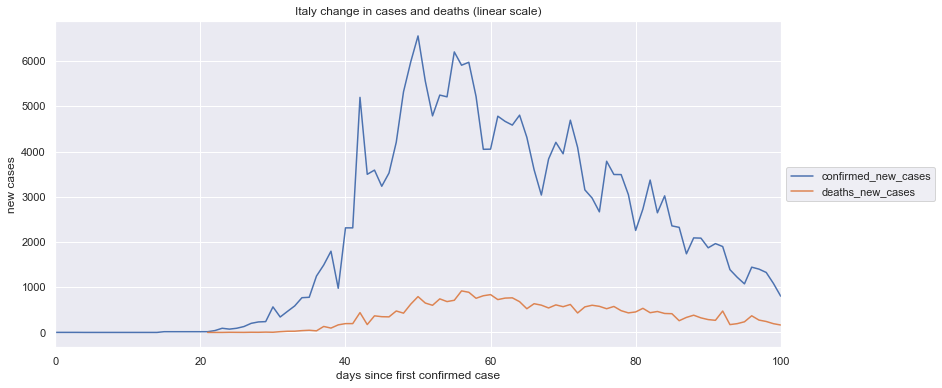

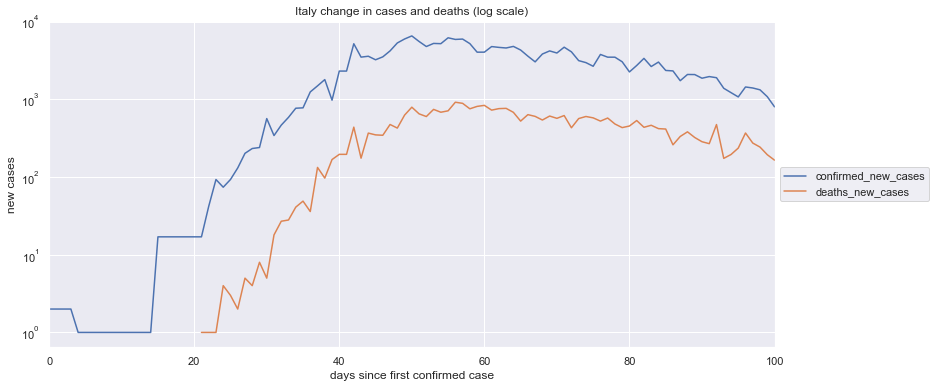

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
105    1229331   73455       NaN                     2.074146   
106    1257023   75662       NaN                     2.252607   
107    1283929   77180       NaN                     2.140454   
108    1309550   78795       NaN                     1.995515   
109    1329260   79526       NaN                     1.505097   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
105                                      309180.428674                 
106                                      335782.554029                 
107                                      319064.548620                 
108                                      297459.406198                 
109                                      224355.736252                 

     deaths_percentage_change  \
105                  3.364573   
106                  3.004561   
107                  2.006291   
108                  2.092511   
109                  0.927724   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
105                                      501536.523863           
106                                      447871.686995           
107                                      299065.690836           
108                                      311917.966560           
109                                      138290.184368           

     confirmed_new_cases  deaths_new_cases  
105              24980.0            2391.0  
106              27692.0            2207.0  
107              26906.0            1518.0  
108              25621.0            1615.0  
109              19710.0             731.0

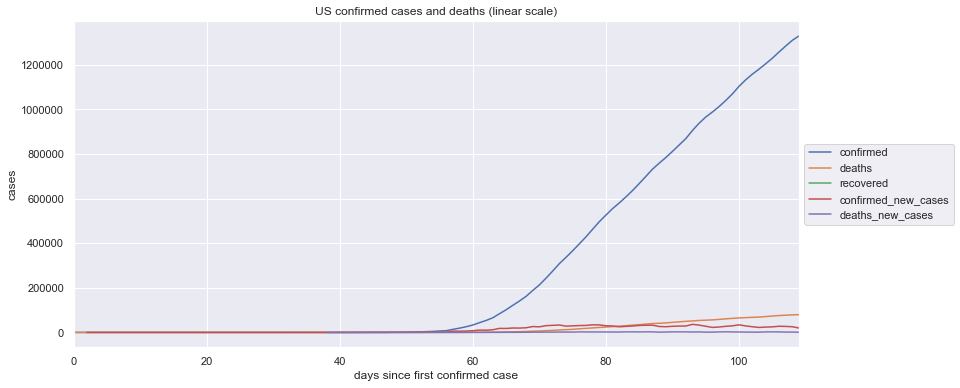

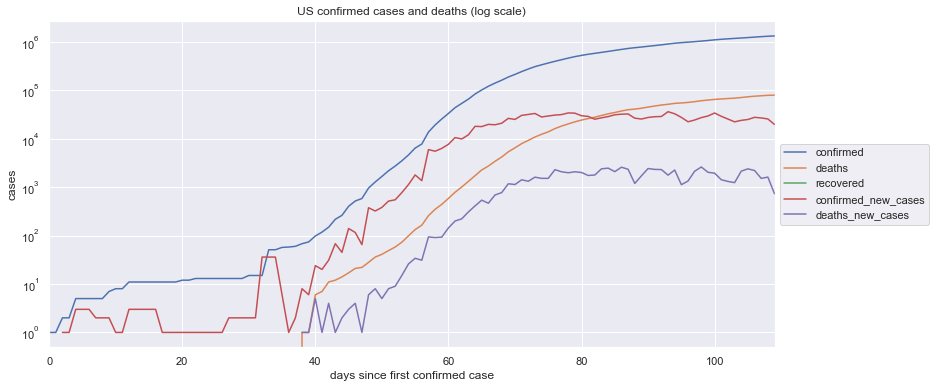

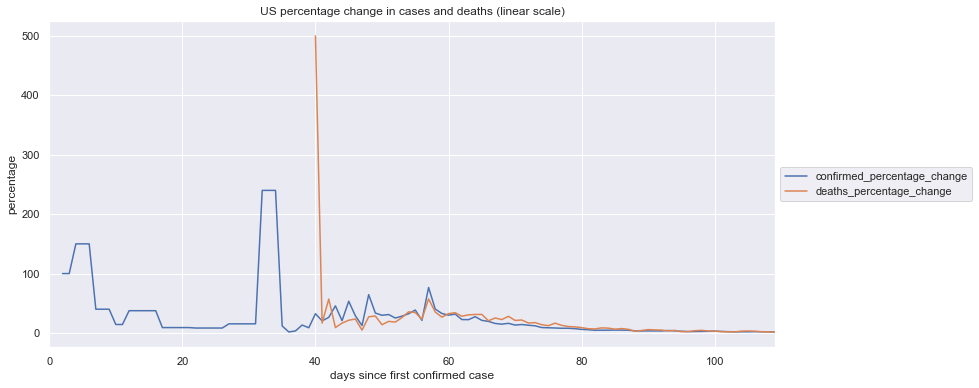

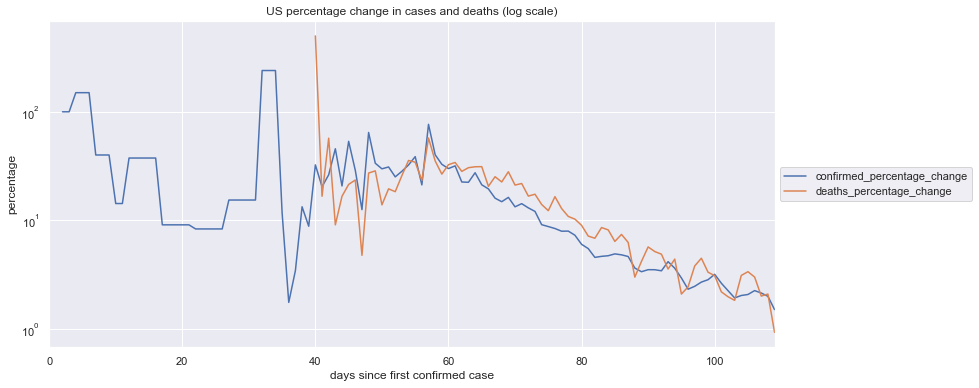

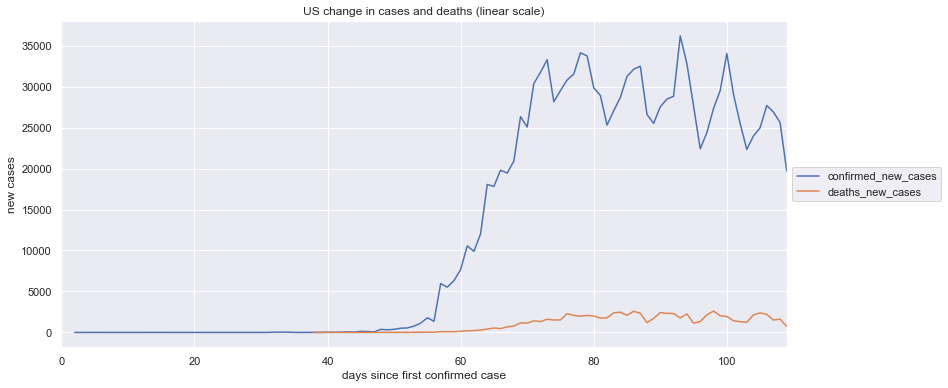

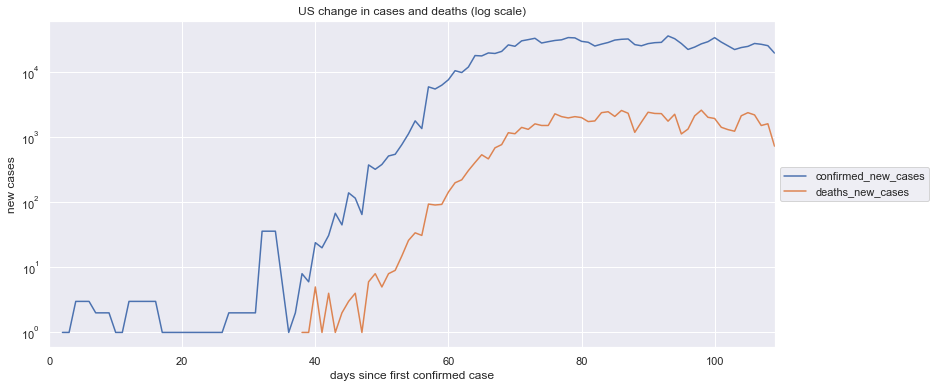

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
105                  10810                 256                   NaN   
106                  10822                 256                   NaN   
107                  10840                 256                   NaN   
108                  10874                 256                   NaN   
109                  10909                 256                   NaN   

     confirmed_percentage_change_South_Korea  \
105                                 0.037016   
106                                 0.111008   
107                                 0.166328   
108                                 0.313653   
109                                 0.321869   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
105                                         114.541080                             
106                                         343.496089                             
107                                         514.672805                             
108                                         970.545455                             
109                                         995.967027                             

     deaths_percentage_change_South_Korea  \
105                              0.392157   
106                                   NaN   
107                                   NaN   
108                                   NaN   
109                                   NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
105                                        1213.461676                       
106                                                NaN                       
107                                                NaN                       
108                                                NaN                       
109                                                NaN                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
105                              4.0                           1.0   
106                             12.0                           NaN   
107                             18.0                           NaN   
108                             34.0                           NaN   
109                             35.0                           NaN   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
105               NaN            NaN              NaN   
106               NaN            NaN              NaN   
107               NaN            NaN              NaN   
108               NaN            NaN              NaN   
109               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
105                                 NaN   
106                                 NaN   
107                                 NaN   
108                                 NaN   
109                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
105                                                NaN                        
106                                                NaN                        
107                                                NaN                        
108                                                NaN                        
109                                                NaN                        

     deaths_percentage_change_Sweden  \
105                              NaN   
106                              NaN   
107                              NaN   
108                              NaN   
109                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
105                                                NaN                  
106                                                NaN                  
107                                                NaN                  
108    

# comparisons: confirmed cases

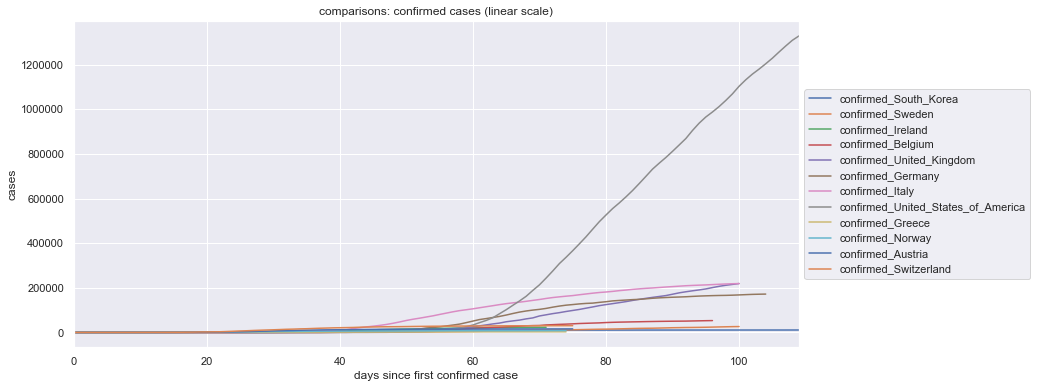

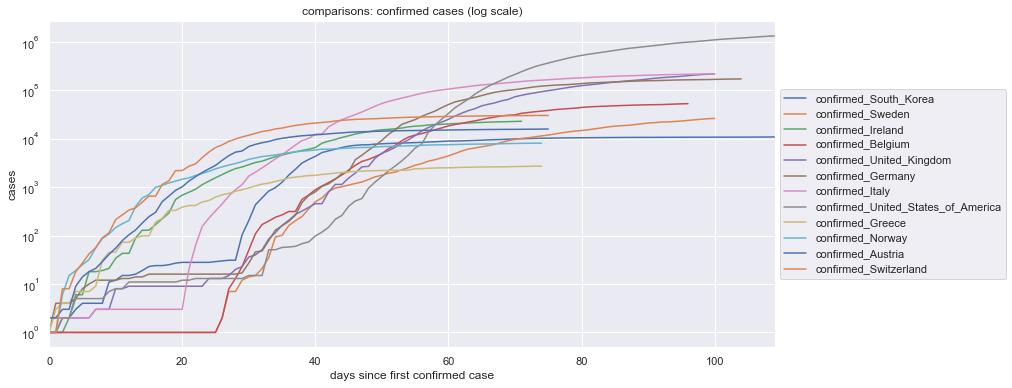

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

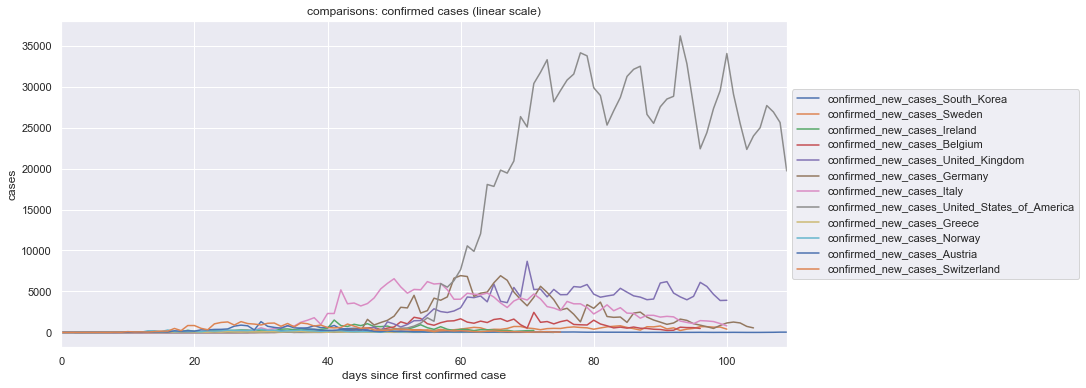

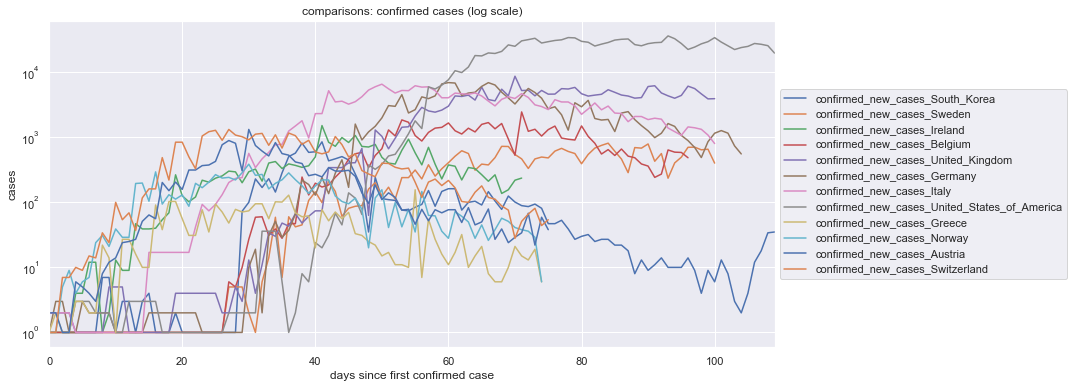

In [24]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

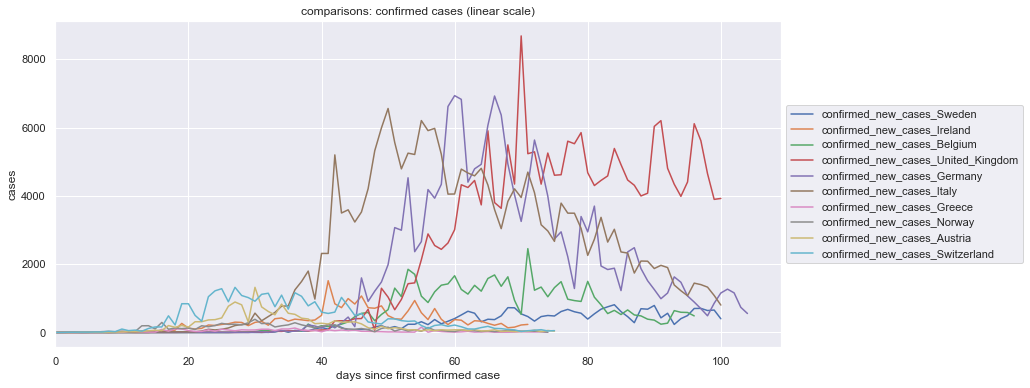

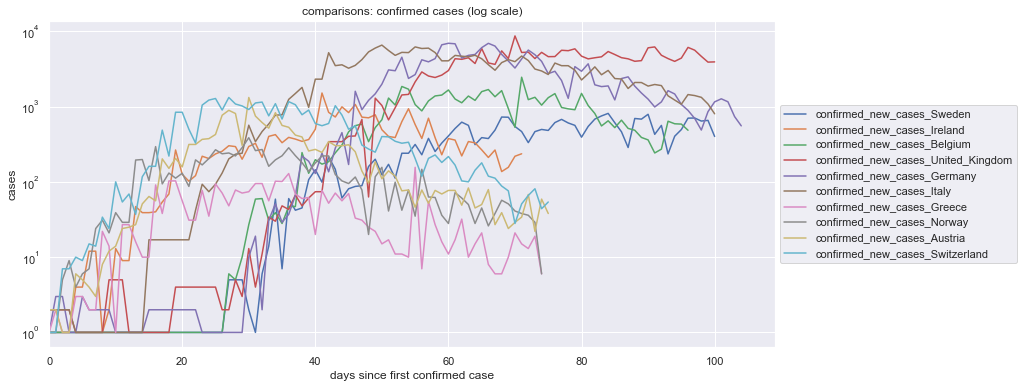

In [25]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
105                 256            NaN             NaN             NaN   
106                 256            NaN             NaN             NaN   
107                 256            NaN             NaN             NaN   
108                 256            NaN             NaN             NaN   
109                 256            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
105                    NaN             NaN           NaN   
106                    NaN             NaN           NaN   
107                    NaN             NaN           NaN   
108                    NaN             NaN           NaN   
109                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
105                            73455            NaN            NaN   
106                            75662            NaN            NaN   
107                            77180            NaN            NaN   
108                            78795            NaN            NaN   
109                            79526            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
105             NaN                 NaN  
106             NaN                 NaN  
107             NaN                 NaN  
108             NaN                 NaN  
109             NaN                 NaN

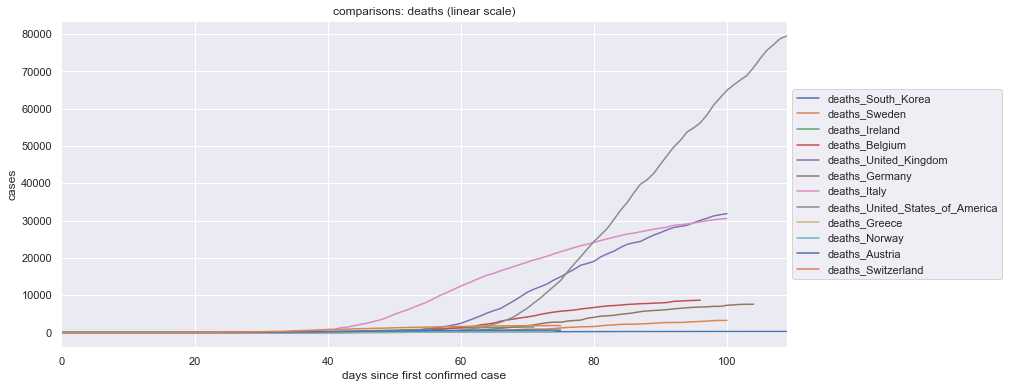

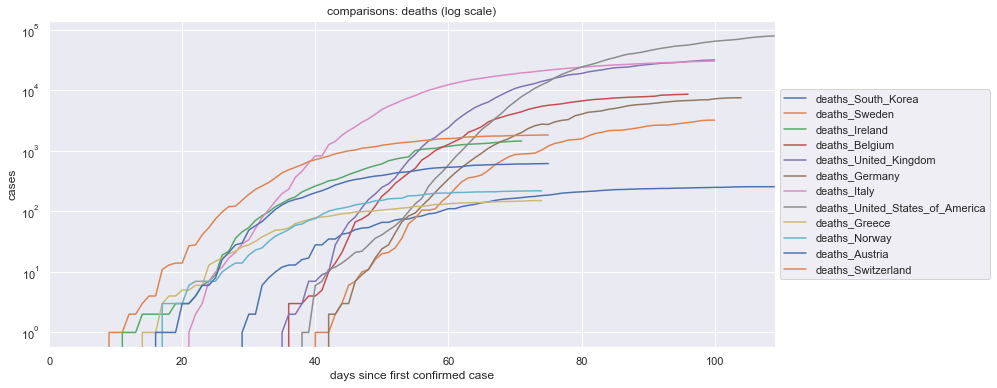

In [26]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
105            NaN             NaN             NaN                    NaN   
106            NaN             NaN             NaN                    NaN   
107            NaN             NaN             NaN                    NaN   
108            NaN             NaN             NaN                    NaN   
109            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
105             NaN           NaN            NaN            NaN   
106             NaN           NaN            NaN            NaN   
107             NaN           NaN            NaN            NaN   
108             NaN           NaN            NaN            NaN   
109             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
105             NaN                 NaN  
106             NaN                 NaN  
107             NaN                 NaN  
108             NaN                 NaN  
109             NaN                 NaN

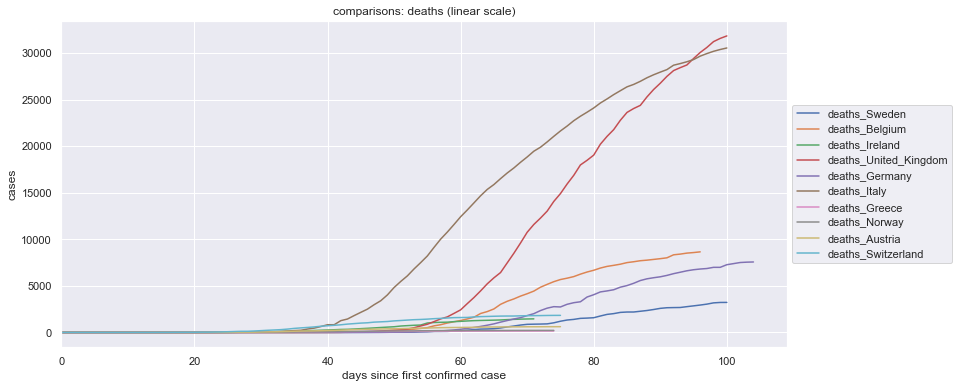

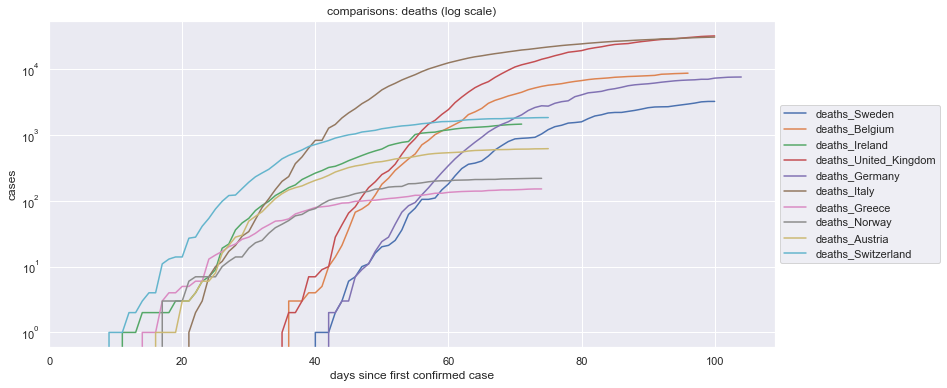

In [27]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
105                           1.0                      NaN   
106                           NaN                      NaN   
107                           NaN                      NaN   
108                           NaN                      NaN   
109                           NaN                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
105                       NaN                       NaN   
106                       NaN                       NaN   
107                       NaN                       NaN   
108                       NaN                       NaN   
109                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
105                              NaN                       NaN   
106                              NaN                       NaN   
107                              NaN                       NaN   
108                              NaN                       NaN   
109                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
105                     NaN                                     2391.0   
106                     NaN                                     2207.0   
107                     NaN                                     1518.0   
108                     NaN                                     1615.0   
109                     NaN                                      731.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
105                      NaN                      NaN   
106                      NaN                      NaN   
107                      NaN                      NaN   
108                      NaN                      NaN   
109                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
105                       NaN                           NaN  
106                       NaN                           NaN  
107                       NaN                           NaN  
108                       NaN                           NaN  
109                       NaN                           NaN

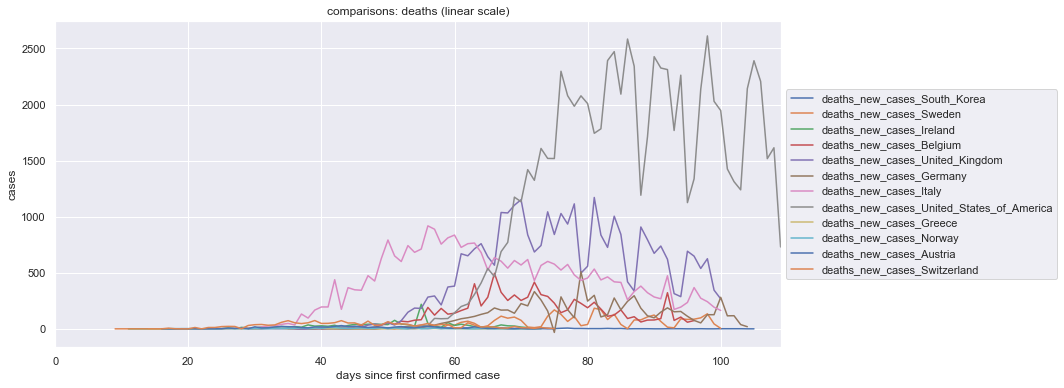

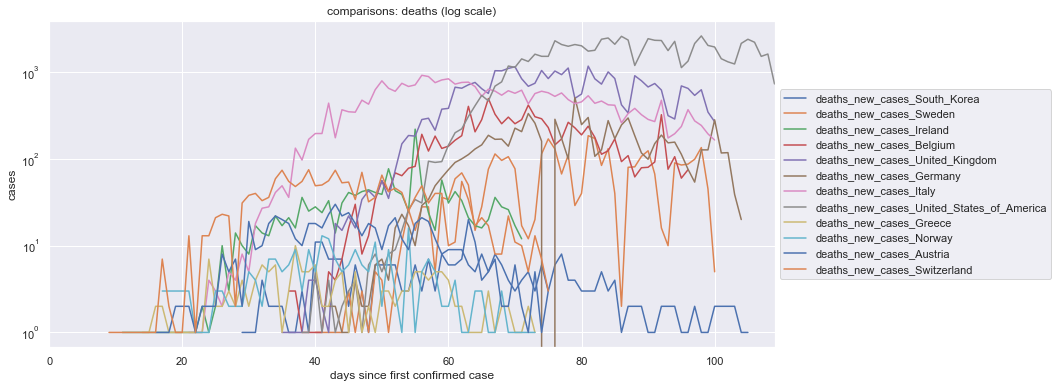

In [28]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
105                      NaN                       NaN   
106                      NaN                       NaN   
107                      NaN                       NaN   
108                      NaN                       NaN   
109                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
105                       NaN                              NaN   
106                       NaN                              NaN   
107                       NaN                              NaN   
108                       NaN                              NaN   
109                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
105                       NaN                     NaN   
106                       NaN                     NaN   
107                       NaN                     NaN   
108                       NaN                     NaN   
109                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
105                      NaN                      NaN   
106                      NaN                      NaN   
107                      NaN                      NaN   
108                      NaN                      NaN   
109                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
105                       NaN                           NaN  
106                       NaN                           NaN  
107                       NaN                           NaN  
108                       NaN                           NaN  
109                       NaN                           NaN

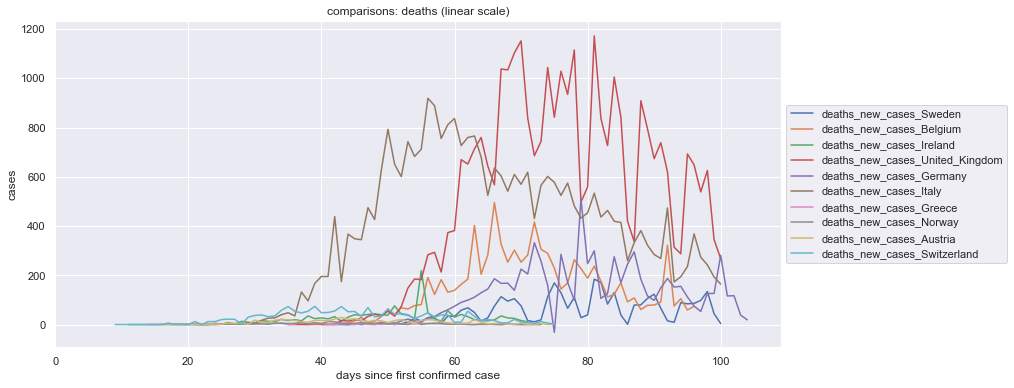

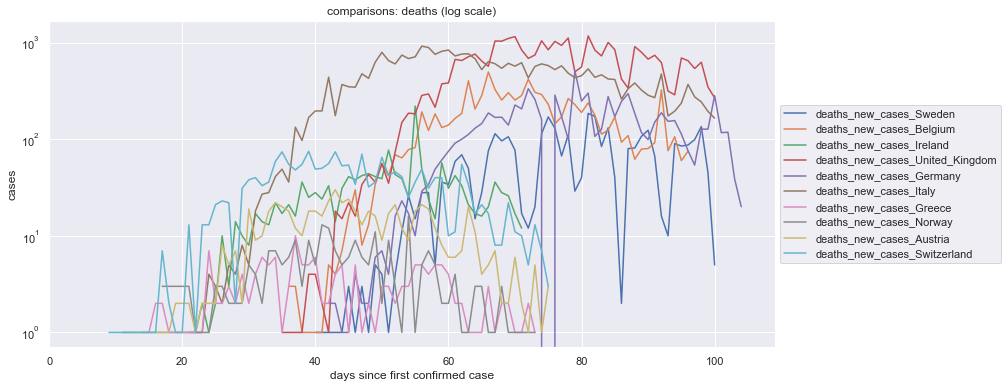

In [29]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
105                                 0.037016   
106                                 0.111008   
107                                 0.166328   
108                                 0.313653   
109                                 0.321869   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
105                                 NaN                                  NaN   
106                                 NaN                                  NaN   
107                                 NaN                                  NaN   
108                                 NaN                                  NaN   
109                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
105                                  NaN   
106                                  NaN   
107                                  NaN   
108                                  NaN   
109                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
105                                         NaN   
106                                         NaN   
107                                         NaN   
108                                         NaN   
109                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
105                                  NaN                                NaN   
106                                  NaN                                NaN   
107                                  NaN                                NaN   
108                                  NaN                                NaN   
109                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
105                                           2.074146      
106                                           2.252607      
107                                           2.140454      
108                                           1.995515      
109                                           1.505097      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
105                                 NaN                                 NaN   
106                                 NaN                                 NaN   
107                                 NaN                                 NaN   
108                                 NaN                                 NaN   
109                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
105                                  NaN   
106                                  NaN   
107                                  NaN   
108                                  NaN   
109                                  NaN   

     confirmed_percentage_change_Switzerland  
105                                      NaN  
106                                      NaN  
107                                      NaN  
108                                      NaN  
109                                      NaN

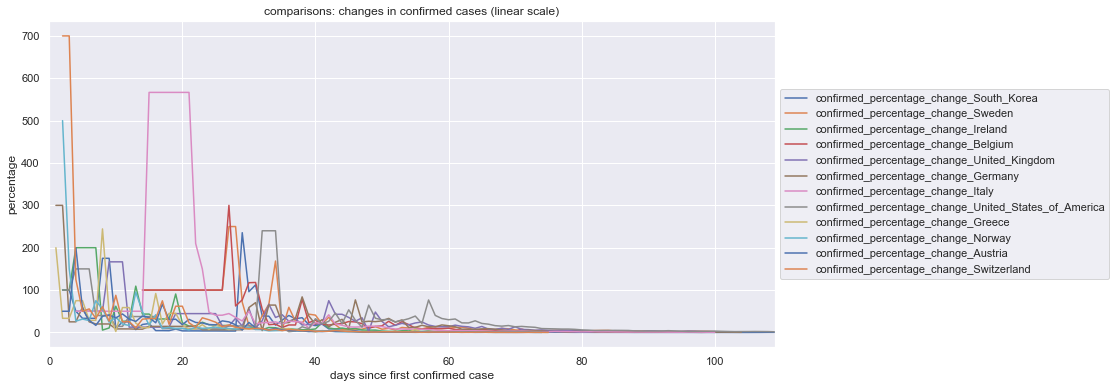

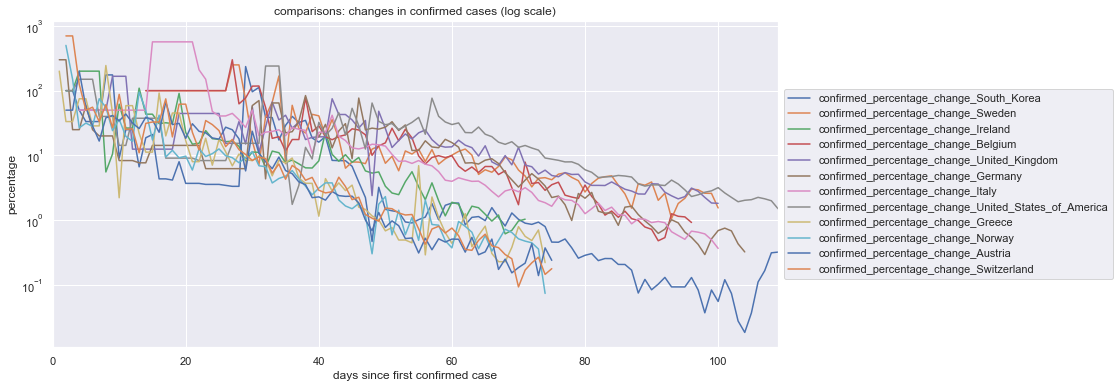

In [30]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
105                              0.392157                              NaN   
106                                   NaN                              NaN   
107                                   NaN                              NaN   
108                                   NaN                              NaN   
109                                   NaN                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
105                               NaN                               NaN   
106                               NaN                               NaN   
107                               NaN                               NaN   
108                               NaN                               NaN   
109                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
105                                      NaN   
106                                      NaN   
107                                      NaN   
108                                      NaN   
109                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
105                               NaN                             NaN   
106                               NaN                             NaN   
107                               NaN                             NaN   
108                               NaN                             NaN   
109                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
105                                           3.364573   
106                                           3.004561   
107                                           2.006291   
108                                           2.092511   
109                                           0.927724   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
105                              NaN                              NaN   
106                              NaN                              NaN   
107                              NaN                              NaN   
108                              NaN                              NaN   
109                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
105                               NaN                                   NaN  
106                               NaN                                   NaN  
107                               NaN                                   NaN  
108                               NaN                                   NaN  
109                               NaN                                   NaN

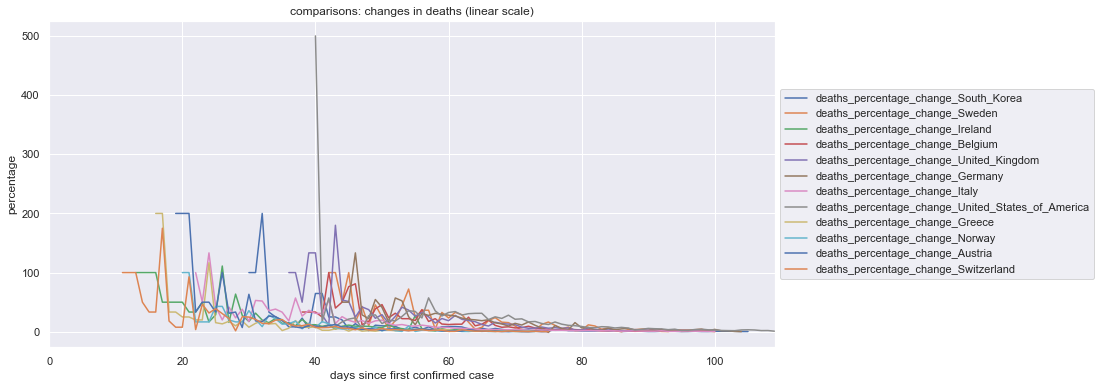

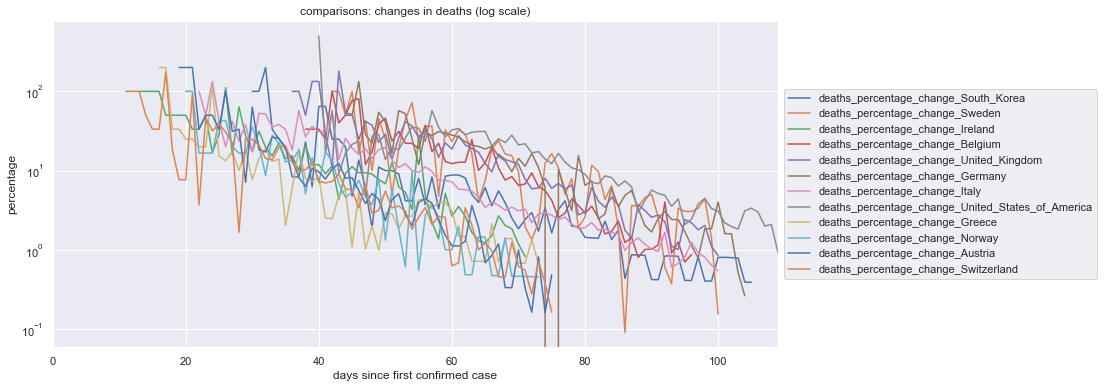

In [31]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
105                              NaN                               NaN   
106                              NaN                               NaN   
107                              NaN                               NaN   
108                              NaN                               NaN   
109                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
105                               NaN   
106                               NaN   
107                               NaN   
108                               NaN   
109                               NaN   

     deaths_percentage_change_United_Kingdom  \
105                                      NaN   
106                                      NaN   
107                                      NaN   
108                                      NaN   
109                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
105                               NaN                             NaN   
106                               NaN                             NaN   
107                               NaN                             NaN   
108                               NaN                             NaN   
109                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
105                              NaN                              NaN   
106                              NaN                              NaN   
107                              NaN                              NaN   
108                              NaN                              NaN   
109                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
105                               NaN                                   NaN  
106                               NaN                                   NaN  
107                               NaN                                   NaN  
108                               NaN                                   NaN  
109                               NaN                                   NaN

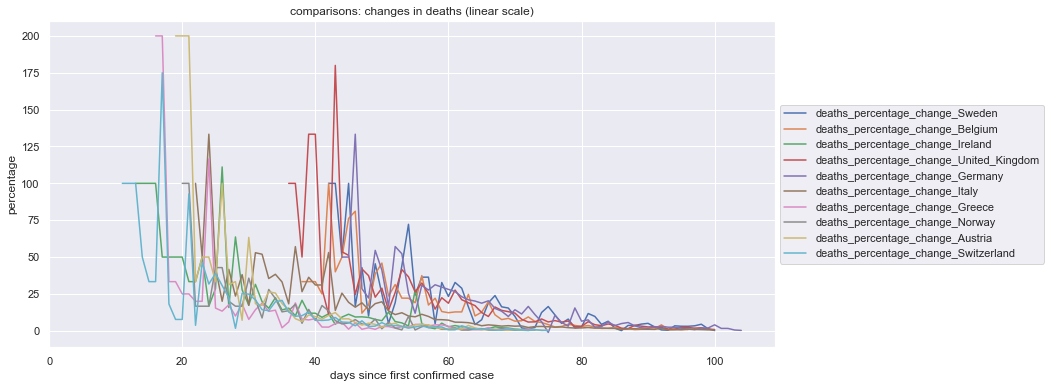

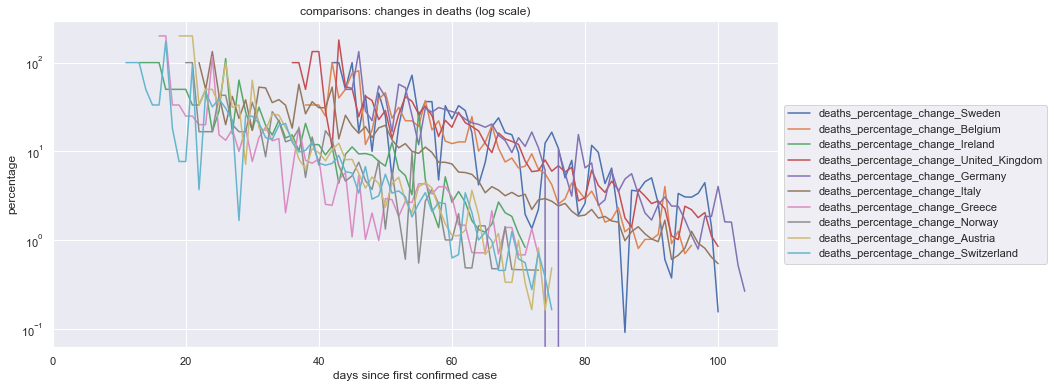

In [32]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');